***In21-S4-CS3111 - Introduction to Machine Learning*** <br>
**K.S. RANASINGHE**<br>
**210518H**

# Lab 02 - Regression

### Background
The dataset originates from an ML Hackathon organized by HackerEarth. It contains information on various properties located in the United States and aims to facilitate the prediction of their Habitability Score. It contains the training dataset (train.csv) which will be ussed to build the ML model and the testing dataset (test.csv) which will be used to see how well your model performs on unseen data.


### **TRIAL 01**

In the first trial I applied the basic pre-processing techniques on the dataset and built the model. <br>
i.e. simple imputation for missing values, encoded using ordinal encoder and built the ML model.

In [1]:
import pandas as pd

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

print('The shape of training dataset : ' + str(train_data.shape))
print('The shape of testing dataset : ' + str(test_data.shape))

The shape of training dataset : (31599, 15)
The shape of testing dataset : (7900, 14)


In [2]:
import pandas as pd

unique_value_counts = train_data.nunique()

print("Number of unique values in each column:")
print(unique_value_counts)

Number of unique values in each column:
Id                        31599
Property_Type                 6
Property_Area              4181
Number_of_Windows            16
Number_of_Doors               6
Furnishing                    3
Frequency_of_Powercuts        4
Power_Backup                  3
Water_Supply                  5
Traffic_Density_Score       762
Crime_Rate                    4
Dust_and_Noise                3
Air_Quality_Index           443
Neighborhood_Review         410
Habitability_score         5771
dtype: int64


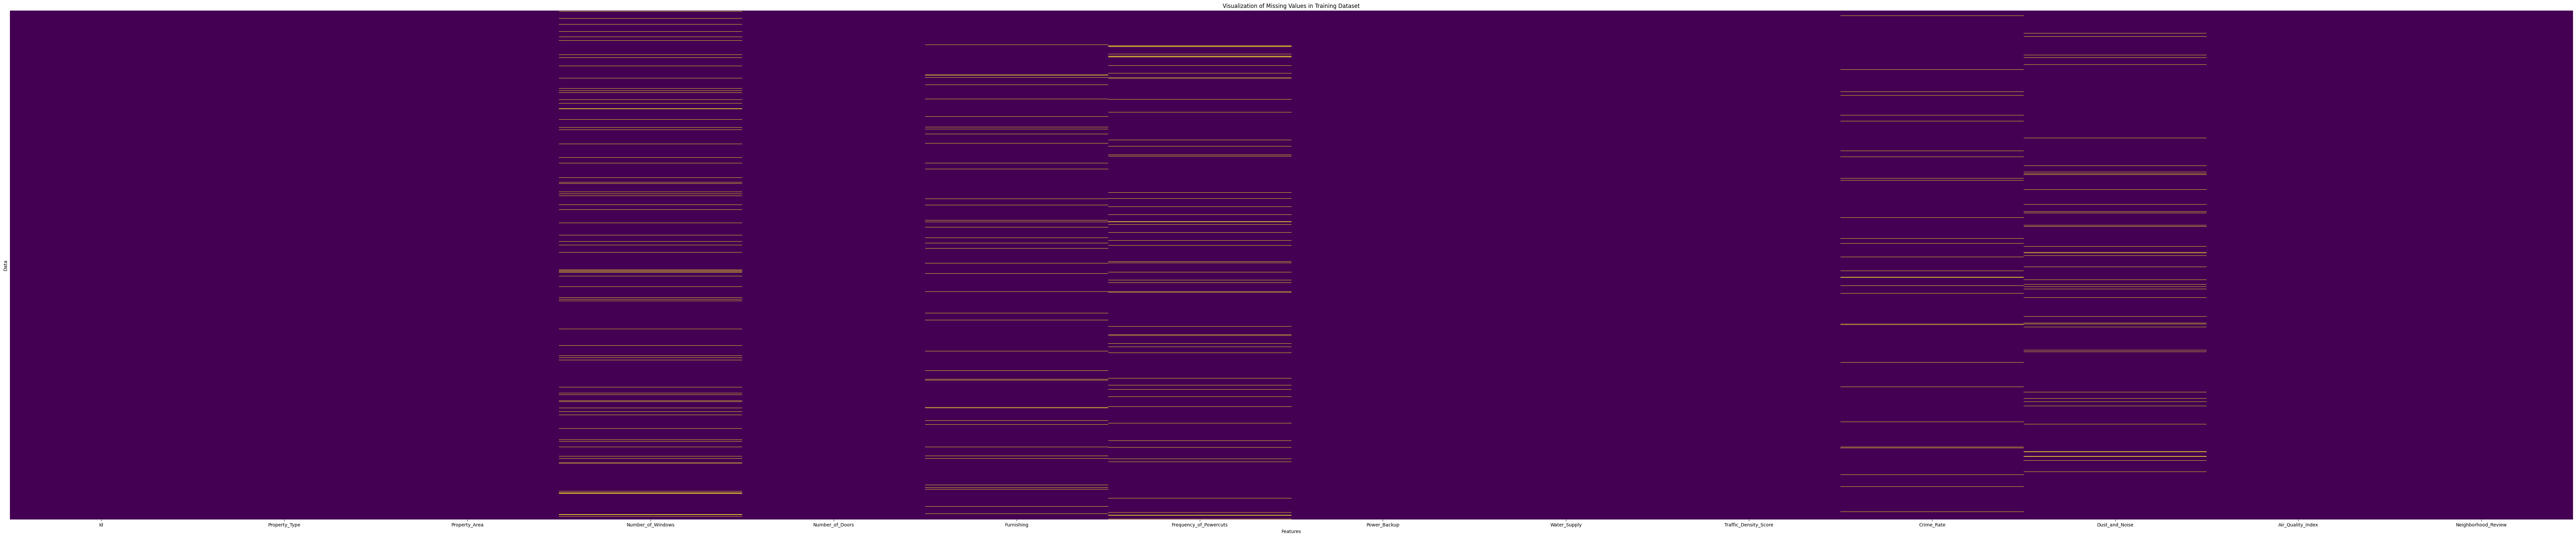

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(100,20))
sns.heatmap(test_data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.xlabel('Features')
plt.ylabel('Data')
plt.title('Visualization of Missing Values in Training Dataset')
plt.show()

In [4]:
columns_with_missing_values = test_data.columns[test_data.isnull().any()]

for column in columns_with_missing_values:
    missing_count = test_data[column].isnull().sum()
    print(f"Column '{column}' has {missing_count} missing values.")

Column 'Number_of_Windows' has 321 missing values.
Column 'Furnishing' has 214 missing values.
Column 'Frequency_of_Powercuts' has 274 missing values.
Column 'Crime_Rate' has 158 missing values.
Column 'Dust_and_Noise' has 220 missing values.


First we will impute the numerical features using the mean

In [5]:
from sklearn.impute import SimpleImputer

Missing_features = ['Number_of_Windows', 'Frequency_of_Powercuts']
imputer = SimpleImputer(strategy='mean')
imputer.fit(train_data[Missing_features])
train_data[Missing_features] = imputer.transform(train_data[Missing_features])

print(train_data.isnull().sum())

Id                          0
Property_Type               0
Property_Area               0
Number_of_Windows           0
Number_of_Doors             0
Furnishing                828
Frequency_of_Powercuts      0
Power_Backup                0
Water_Supply                0
Traffic_Density_Score       0
Crime_Rate                629
Dust_and_Noise            999
Air_Quality_Index           0
Neighborhood_Review         0
Habitability_score          0
dtype: int64


Now we will impute the categorical features using most frequent value

In [6]:
from sklearn.impute import SimpleImputer

categorical_features = ['Furnishing', 'Crime_Rate', 'Dust_and_Noise']
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(train_data[categorical_features])
train_data[categorical_features] = imputer.transform(train_data[categorical_features])

print(train_data.isnull().sum())

Id                        0
Property_Type             0
Property_Area             0
Number_of_Windows         0
Number_of_Doors           0
Furnishing                0
Frequency_of_Powercuts    0
Power_Backup              0
Water_Supply              0
Traffic_Density_Score     0
Crime_Rate                0
Dust_and_Noise            0
Air_Quality_Index         0
Neighborhood_Review       0
Habitability_score        0
dtype: int64


In [7]:
from sklearn.preprocessing import OrdinalEncoder

categorical_features = ['Property_Type', 'Furnishing', 'Power_Backup', 'Water_Supply', 'Crime_Rate', 'Dust_and_Noise'] 

ordinal_encoder = OrdinalEncoder()
train_data[categorical_features] = ordinal_encoder.fit_transform(train_data[categorical_features])

train_data.head()

,Id,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,1.0,106,3.926254,1,1.0,0.0,1.0,3.0,5.89,1.0,2.0,90.0,3.86,71.98
1,0x68d4,1.0,733,2.000000,2,2.0,1.0,1.0,2.0,4.37,3.0,2.0,96.0,3.55,71.20
2,0x7d81,1.0,737,4.000000,2,0.0,0.0,1.0,3.0,7.45,1.0,2.0,121.0,3.81,71.39
3,0x7a57,1.0,900,3.000000,2,2.0,2.0,2.0,3.0,6.16,2.0,2.0,100.0,1.34,31.46
4,0x9409,2.0,2238,14.000000,6,0.0,0.0,1.0,0.0,5.46,3.0,2.0,116.0,4.77,93.70


feature 'Id' is not usefull when predicting the target variable. Therefore, we will remove it from the dataset.

In [8]:
train_data = train_data.drop(columns=['Id'])

We will used the pre-processed dataset to train the ML model. In here we will be using XGBRegressor for the model.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error

X = train_data.drop(columns=['Habitability_score'])
y = train_data['Habitability_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)

mse = root_mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 6.181512655182555


Since this is giving a large error I tried some other models as well and found out the best performing model is RandomForestRegressor

In [10]:
from sklearn.ensemble import RandomForestRegressor

X = train_data.drop(columns=['Habitability_score'])
y = train_data['Habitability_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

mse = root_mean_squared_error(y_test, y_pred)
print("Mean Squared Error (Random Forest):", mse)

Mean Squared Error (Random Forest): 5.985301714644463


Given below are the other evaluation metrics for this model

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, explained_variance_score

mae_stacked = mean_absolute_error(y_test, y_pred)
mse_stacked = mean_squared_error(y_test, y_pred)
r2_stacked = r2_score(y_test, y_pred)
mape_stacked = mean_absolute_percentage_error(y_test, y_pred)
explained_variance_stacked = explained_variance_score(y_test, y_pred)

print("Mean Absolute Error:", mae_stacked)
print("Mean Squared Error:", mse_stacked)
print("R-squared:", r2_stacked)
print("Mean Absolute Percentage Error:", mape_stacked)
print("Explained Variance Score:", explained_variance_stacked)

Mean Absolute Error: 4.528369873417722
Mean Squared Error: 35.82383661532595
R-squared: 0.8116045776947481
Mean Absolute Percentage Error: 0.06826812026810912
Explained Variance Score: 0.8116178170379008


Below code could be used to evaluate whether the model is underfitting or overfitting

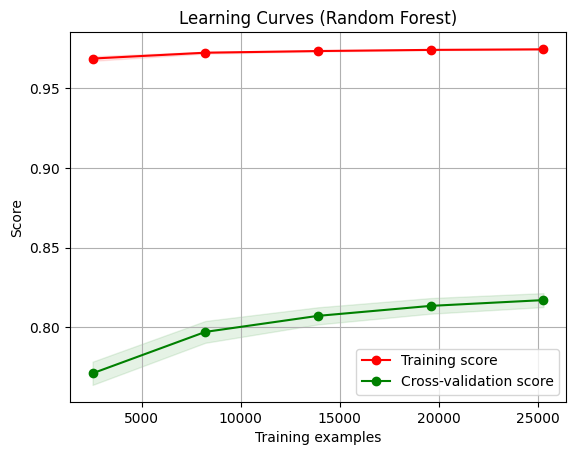

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit

X = train_data.drop(columns=['Habitability_score'])
y = train_data['Habitability_score']

model = RandomForestRegressor()

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

plot_learning_curve(model, "Learning Curves (Random Forest)", X, y, cv=cv, n_jobs=-1)
plt.show()

As you can see above both curves are flattening out. But there is a gap of around 0.15 between the two curves with the training curve performing better than the other. Using this information we can conclude that the model is overfitting the dataset.
<br>
<br>
<br>
<br>

## TRIAL 02 - Prediction instead of Imputation

In our second attempt we will try a few things differently. Firstly we will use a training model to fill missing values rather than imputation. And later on when we are building the model we will try out different techniques.

In [38]:
import pandas as pd

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

print('The shape of training dataset : ' + str(train_data.shape))
print('The shape of testing dataset : ' + str(test_data.shape))

The shape of training dataset : (31599, 15)
The shape of testing dataset : (7900, 14)


In [39]:
good_features = train_data.dropna(axis=1).columns.tolist()
missing_features = [col for col in train_data.columns if col not in good_features]

print('Features with missing values :', missing_features)
print('Features without missing values :', good_features)

Features with missing values : ['Number_of_Windows', 'Furnishing', 'Frequency_of_Powercuts', 'Crime_Rate', 'Dust_and_Noise']
Features without missing values : ['Id', 'Property_Type', 'Property_Area', 'Number_of_Doors', 'Power_Backup', 'Water_Supply', 'Traffic_Density_Score', 'Air_Quality_Index', 'Neighborhood_Review', 'Habitability_score']


In [40]:
good_features.extend([missing_features[0]])
print(good_features)

['Id', 'Property_Type', 'Property_Area', 'Number_of_Doors', 'Power_Backup', 'Water_Supply', 'Traffic_Density_Score', 'Air_Quality_Index', 'Neighborhood_Review', 'Habitability_score', 'Number_of_Windows']


What we are doing here is creating a new dataset as 'temp_data' which contains all the features without missing values and one feature with missing values

In [41]:
temp_data = train_data[good_features]
temp_data.head()

,Id,Property_Type,Property_Area,Number_of_Doors,Power_Backup,Water_Supply,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score,Number_of_Windows
0,0x21e3,Apartment,106,1,No,Once in a day - Morning,5.89,90.0,3.86,71.98,NaN
1,0x68d4,Apartment,733,2,No,Once in a day - Evening,4.37,96.0,3.55,71.20,2.0
2,0x7d81,Apartment,737,2,No,Once in a day - Morning,7.45,121.0,3.81,71.39,4.0
3,0x7a57,Apartment,900,2,Yes,Once in a day - Morning,6.16,100.0,1.34,31.46,3.0
4,0x9409,Bungalow,2238,6,No,All time,5.46,116.0,4.77,93.70,14.0


We will remove the feature 'Id' and encode the categorical features

In [42]:
from sklearn.preprocessing import OrdinalEncoder

temp_data = temp_data.drop(columns=['Id'])
categorical_features = ['Property_Type', 'Power_Backup', 'Water_Supply'] 

ordinal_encoder = OrdinalEncoder()
temp_data[categorical_features] = ordinal_encoder.fit_transform(temp_data[categorical_features])

temp_data.head()

,Property_Type,Property_Area,Number_of_Doors,Power_Backup,Water_Supply,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score,Number_of_Windows
0,1.0,106,1,1.0,3.0,5.89,90.0,3.86,71.98,NaN
1,1.0,733,2,1.0,2.0,4.37,96.0,3.55,71.20,2.0
2,1.0,737,2,1.0,3.0,7.45,121.0,3.81,71.39,4.0
3,1.0,900,2,2.0,3.0,6.16,100.0,1.34,31.46,3.0
4,2.0,2238,6,1.0,0.0,5.46,116.0,4.77,93.70,14.0


Now we will seperate the 'temp_data' dataset to two. One will contain the rows with missing data and the other will have a complete dataset. We will use the later to train the model and predict the missing values in former dataset.

In [43]:
missing_set = temp_data[temp_data.isnull().any(axis=1)]
print(missing_set.shape)

temp_data.dropna(axis=0, inplace=True)
print(temp_data.shape)

(1333, 10)
(30266, 10)


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import numpy as np

X_train = temp_data.drop(columns=['Number_of_Windows'])
y_train = temp_data['Number_of_Windows']

model = LinearRegression()
model.fit(X_train, y_train)

X_test = missing_set.drop(columns=['Number_of_Windows'])
predicted_values = model.predict(X_test)

print(predicted_values)

[2.37332398 2.8866663  4.33774741 ... 3.49503777 4.83939758 4.46964845]


We will create a new dataset which will merge the 'temp_data' and 'missing_set' datasets as 'combined_data'.

In [45]:
missing_set['Number_of_Windows'] = predicted_values
combined_data = pd.concat([temp_data, missing_set])
combined_data.sort_index(inplace=True)

print(combined_data)

       Property_Type  Property_Area  Number_of_Doors  Power_Backup  \
0                1.0            106                1           1.0   
1                1.0            733                2           1.0   
2                1.0            737                2           1.0   
3                1.0            900                2           2.0   
4                2.0           2238                6           1.0   
...              ...            ...              ...           ...   
31594            1.0            851                1           1.0   
31595            3.0            315                1           2.0   
31596            4.0            480                3           1.0   
31597            1.0            642                2           1.0   
31598            5.0           1738                4           1.0   

       Water_Supply  Traffic_Density_Score  Air_Quality_Index  \
0               3.0                   5.89               90.0   
1               2.0          

C:\Users\ROG\AppData\Local\Temp\ipykernel_25660\1649329363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_set['Number_of_Windows'] = predicted_values


In [46]:
print(combined_data.isnull().sum())

Property_Type            0
Property_Area            0
Number_of_Doors          0
Power_Backup             0
Water_Supply             0
Traffic_Density_Score    0
Air_Quality_Index        0
Neighborhood_Review      0
Habitability_score       0
Number_of_Windows        0
dtype: int64


We have successfully filled missing values for one column. We will repeat the sam process for the other features with missig values now.

In [47]:
temp_data = combined_data
temp_data['Furnishing'] = train_data['Furnishing']

categorical_features = ['Furnishing'] 

ordinal_encoder = OrdinalEncoder()
temp_data[categorical_features] = ordinal_encoder.fit_transform(temp_data[categorical_features])

missing_set = temp_data[temp_data.isnull().any(axis=1)]
temp_data.dropna(axis=0, inplace=True)

X_train = temp_data.drop(columns=['Furnishing'])
y_train = temp_data['Furnishing']

model = LinearRegression()
model.fit(X_train, y_train)
X_test = missing_set.drop(columns=['Furnishing'])
predicted_values = model.predict(X_test)

missing_set['Furnishing'] = predicted_values
combined_data = pd.concat([temp_data, missing_set])
combined_data.sort_index(inplace=True)

print(combined_data)

       Property_Type  Property_Area  Number_of_Doors  Power_Backup  \
0                1.0            106                1           1.0   
1                1.0            733                2           1.0   
2                1.0            737                2           1.0   
3                1.0            900                2           2.0   
4                2.0           2238                6           1.0   
...              ...            ...              ...           ...   
31594            1.0            851                1           1.0   
31595            3.0            315                1           2.0   
31596            4.0            480                3           1.0   
31597            1.0            642                2           1.0   
31598            5.0           1738                4           1.0   

       Water_Supply  Traffic_Density_Score  Air_Quality_Index  \
0               3.0                   5.89               90.0   
1               2.0          

C:\Users\ROG\AppData\Local\Temp\ipykernel_25660\2653581696.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_set['Furnishing'] = predicted_values


In [48]:
temp_data = combined_data
temp_data['Frequency_of_Powercuts'] = train_data['Frequency_of_Powercuts']

missing_set = temp_data[temp_data.isnull().any(axis=1)]
temp_data.dropna(axis=0, inplace=True)

X_train = temp_data.drop(columns=['Frequency_of_Powercuts'])
y_train = temp_data['Frequency_of_Powercuts']

model = LinearRegression()
model.fit(X_train, y_train)
X_test = missing_set.drop(columns=['Frequency_of_Powercuts'])
predicted_values = model.predict(X_test)

missing_set['Frequency_of_Powercuts'] = predicted_values
combined_data = pd.concat([temp_data, missing_set])
combined_data.sort_index(inplace=True)

print(combined_data)

       Property_Type  Property_Area  Number_of_Doors  Power_Backup  \
0                1.0            106                1           1.0   
1                1.0            733                2           1.0   
2                1.0            737                2           1.0   
3                1.0            900                2           2.0   
4                2.0           2238                6           1.0   
...              ...            ...              ...           ...   
31594            1.0            851                1           1.0   
31595            3.0            315                1           2.0   
31596            4.0            480                3           1.0   
31597            1.0            642                2           1.0   
31598            5.0           1738                4           1.0   

       Water_Supply  Traffic_Density_Score  Air_Quality_Index  \
0               3.0                   5.89               90.0   
1               2.0          

C:\Users\ROG\AppData\Local\Temp\ipykernel_25660\1269112938.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_set['Frequency_of_Powercuts'] = predicted_values


In [49]:
temp_data = combined_data
temp_data['Crime_Rate'] = train_data['Crime_Rate']

categorical_features = ['Crime_Rate'] 

ordinal_encoder = OrdinalEncoder()
temp_data[categorical_features] = ordinal_encoder.fit_transform(temp_data[categorical_features])

missing_set = temp_data[temp_data.isnull().any(axis=1)]
temp_data.dropna(axis=0, inplace=True)

X_train = temp_data.drop(columns=['Crime_Rate'])
y_train = temp_data['Crime_Rate']

model = LinearRegression()
model.fit(X_train, y_train)
X_test = missing_set.drop(columns=['Crime_Rate'])
predicted_values = model.predict(X_test)

missing_set['Crime_Rate'] = predicted_values
combined_data = pd.concat([temp_data, missing_set])
combined_data.sort_index(inplace=True)

print(combined_data)

       Property_Type  Property_Area  Number_of_Doors  Power_Backup  \
0                1.0            106                1           1.0   
1                1.0            733                2           1.0   
2                1.0            737                2           1.0   
3                1.0            900                2           2.0   
4                2.0           2238                6           1.0   
...              ...            ...              ...           ...   
31594            1.0            851                1           1.0   
31595            3.0            315                1           2.0   
31596            4.0            480                3           1.0   
31597            1.0            642                2           1.0   
31598            5.0           1738                4           1.0   

       Water_Supply  Traffic_Density_Score  Air_Quality_Index  \
0               3.0                   5.89               90.0   
1               2.0          

C:\Users\ROG\AppData\Local\Temp\ipykernel_25660\3344365539.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_set['Crime_Rate'] = predicted_values


In [50]:
temp_data = combined_data
temp_data['Dust_and_Noise'] = train_data['Dust_and_Noise']

categorical_features = ['Dust_and_Noise'] 

ordinal_encoder = OrdinalEncoder()
temp_data[categorical_features] = ordinal_encoder.fit_transform(temp_data[categorical_features])

missing_set = temp_data[temp_data.isnull().any(axis=1)]
temp_data.dropna(axis=0, inplace=True)

X_train = temp_data.drop(columns=['Dust_and_Noise'])
y_train = temp_data['Dust_and_Noise']

model = LinearRegression()
model.fit(X_train, y_train)
X_test = missing_set.drop(columns=['Dust_and_Noise'])
predicted_values = model.predict(X_test)

missing_set['Dust_and_Noise'] = predicted_values
combined_data = pd.concat([temp_data, missing_set])
combined_data.sort_index(inplace=True)

print(combined_data)

       Property_Type  Property_Area  Number_of_Doors  Power_Backup  \
0                1.0            106                1           1.0   
1                1.0            733                2           1.0   
2                1.0            737                2           1.0   
3                1.0            900                2           2.0   
4                2.0           2238                6           1.0   
...              ...            ...              ...           ...   
31594            1.0            851                1           1.0   
31595            3.0            315                1           2.0   
31596            4.0            480                3           1.0   
31597            1.0            642                2           1.0   
31598            5.0           1738                4           1.0   

       Water_Supply  Traffic_Density_Score  Air_Quality_Index  \
0               3.0                   5.89               90.0   
1               2.0          

C:\Users\ROG\AppData\Local\Temp\ipykernel_25660\742141285.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_set['Dust_and_Noise'] = predicted_values


Using the below code we could visualize the correlation between features after pre-processing the dataset. As you can see there is no substiantial correlation between features. Therefore, we will ignore this.

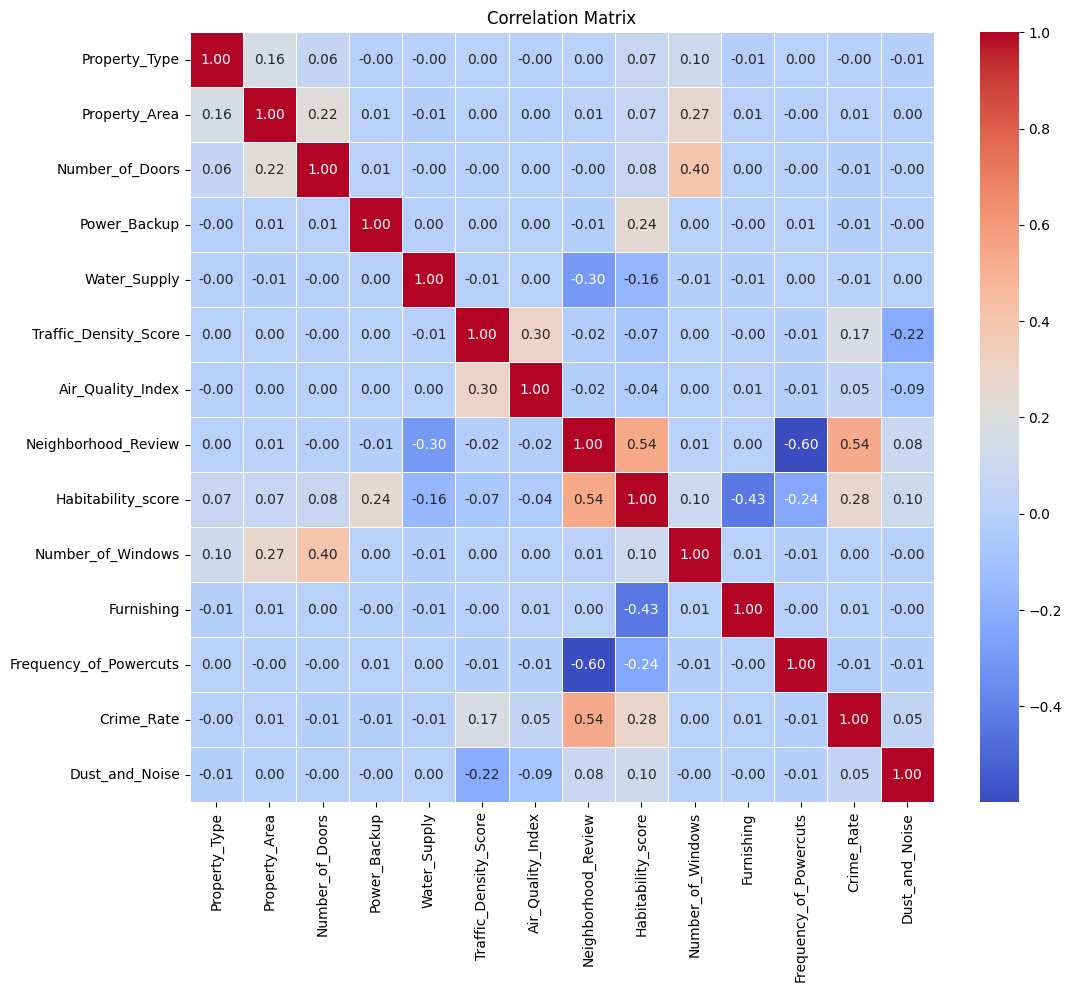

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = combined_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Now we will test the performance of the models created using the pre-processed dataset. In here I only tested tree based models because the dataset is not scaled. Given below are the 3 best performing models. As you can see from the RMSE scores there is an improvement from trial 01.

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(combined_data)

scaled_data = pd.DataFrame(train_scaled, columns=combined_data.columns)
scaled_data.head()

,Property_Type,Property_Area,Number_of_Doors,Power_Backup,Water_Supply,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score,Number_of_Windows,Furnishing,Frequency_of_Powercuts,Crime_Rate,Dust_and_Noise
0,-1.066714,-0.659552,-1.131916,-0.450107,1.160109,-0.382854,-0.505529,0.158931,-0.103023,-0.585229,-0.101525,-0.651054,-0.805340,0.386054
1,-1.066714,-0.338123,-0.283241,-0.450107,0.455169,-1.629394,-0.408865,-0.229401,-0.158161,-0.726193,1.378399,0.687425,0.929106,0.386054
2,-1.066714,-0.336072,-0.283241,-0.450107,1.160109,0.896489,-0.006099,0.096297,-0.144730,0.028986,-1.581449,-0.651054,-0.805340,0.386054
3,-1.066714,-0.252511,-0.283241,1.756707,1.160109,-0.161430,-0.344423,-2.997826,-2.967333,-0.348603,1.378399,2.025903,0.061883,0.386054
4,-0.487574,0.433410,3.111459,-0.450107,-0.954711,-0.735494,-0.086652,1.298870,1.432337,3.804882,-1.581449,-0.651054,0.929106,0.386054


In [16]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

X = scaled_data.drop(columns=['Habitability_score'])
y = combined_data['Habitability_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_regressor = LinearRegression()
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)

mse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", mse)

Root Mean Squared Error: 9.11160495614377


In [52]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error

X = combined_data.drop(columns=['Habitability_score'])
y = combined_data['Habitability_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)

mse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", mse)

Root Mean Squared Error: 5.949670242682937


In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

X = combined_data.drop(columns=['Habitability_score'])
y = combined_data['Habitability_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

mse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error (Random Forest):", mse)

Root Mean Squared Error (Random Forest): 5.565950249378817


In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Assuming combined_data_test contains the testing dataset
X = combined_data.drop(columns=['Habitability_score'])
y = combined_data['Habitability_score']

# Load the testing dataset
test_data = pd.read_csv('test.csv')  # Replace 'combined_data_test.csv' with the actual filename

# Drop any columns not used in training
X_test = combined_test

# Initialize and train the XGBoost regressor
xgb_regressor = RandomForestRegressor()
xgb_regressor.fit(X, y)

# Predict the target variable for the testing dataset
y_pred = xgb_regressor.predict(X_test)

# Create a DataFrame with 'Id' and 'Habitability_score' columns
predictions_df = pd.DataFrame({'Id': test_data['Id'], 'Habitability_score': y_pred})

# Write the predictions to a new CSV file
predictions_df.to_csv("predicted_test4.csv", index=False)


In [38]:
predictions_df.shape

(7900, 2)

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

X = combined_data.drop(columns=['Habitability_score'])
y = combined_data['Habitability_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

extra_trees_regressor = ExtraTreesRegressor()
extra_trees_regressor.fit(X_train, y_train)
y_pred = extra_trees_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error (Extra Trees):", mse)

Root Mean Squared Error (Extra Trees): 32.795936712585444


I found out that we could stack multiple models together to create a model which could perform even better. That is what's being done below.

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression

X = combined_data.drop(columns=['Habitability_score']) 
y = combined_data['Habitability_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor()
xgb_model = XGBRegressor()
et_model = ExtraTreesRegressor()

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
et_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
et_preds = et_model.predict(X_test)

stacked_X_train = np.column_stack((rf_preds, xgb_preds, et_preds))

meta_learner = LinearRegression()
meta_learner.fit(stacked_X_train, y_test)

stacked_preds = meta_learner.predict(stacked_X_train)

mse_stacked = root_mean_squared_error(y_test, stacked_preds)
print("Root Mean Squared Error (Stacked Model):", mse_stacked)

Root Mean Squared Error (Stacked Model): 5.497825695324197


In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, explained_variance_score, max_error, mean_squared_log_error

mae_stacked = mean_absolute_error(y_test, stacked_preds)
rmse_stacked = mean_squared_error(y_test, stacked_preds)
r2_stacked = r2_score(y_test, stacked_preds)
mape_stacked = mean_absolute_percentage_error(y_test, stacked_preds)
explained_variance_stacked = explained_variance_score(y_test, stacked_preds)
max_err_stacked = max_error(y_test, stacked_preds)
mean_squared_log_err_stacked = mean_squared_log_error(y_test, stacked_preds)

print("Mean Absolute Error (Stacked Model):", mae_stacked)
print("Mean Squared Error (Stacked Model):", rmse_stacked)
print("R-squared (Stacked Model):", r2_stacked)
print("Mean Absolute Percentage Error (Stacked Model):", mape_stacked)
print("Explained Variance Score (Stacked Model):", explained_variance_stacked)
print("Max Error (Stacked Model):", max_err_stacked)
print("Mean Squared Log Error (Stacked Model):", mean_squared_log_err_stacked)

Mean Absolute Error (Stacked Model): 4.292745969987085
Mean Squared Error (Stacked Model): 30.22608737616699
R-squared (Stacked Model): 0.8410428074185596
Mean Absolute Percentage Error (Stacked Model): 0.0641511156662835
Explained Variance Score (Stacked Model): 0.8410428074185596
Max Error (Stacked Model): 37.26656870944318
Mean Squared Log Error (Stacked Model): 0.00742650810532961


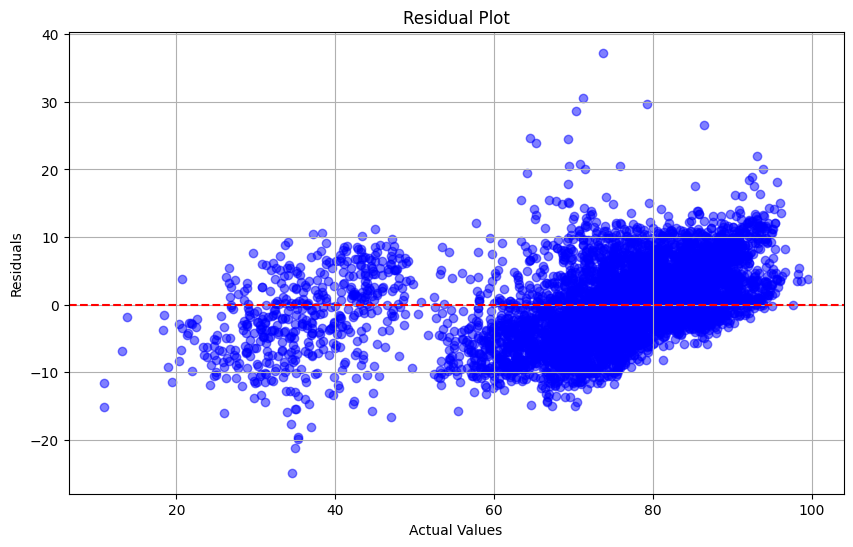

In [57]:
import matplotlib.pyplot as plt

residuals = y_test - stacked_preds

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

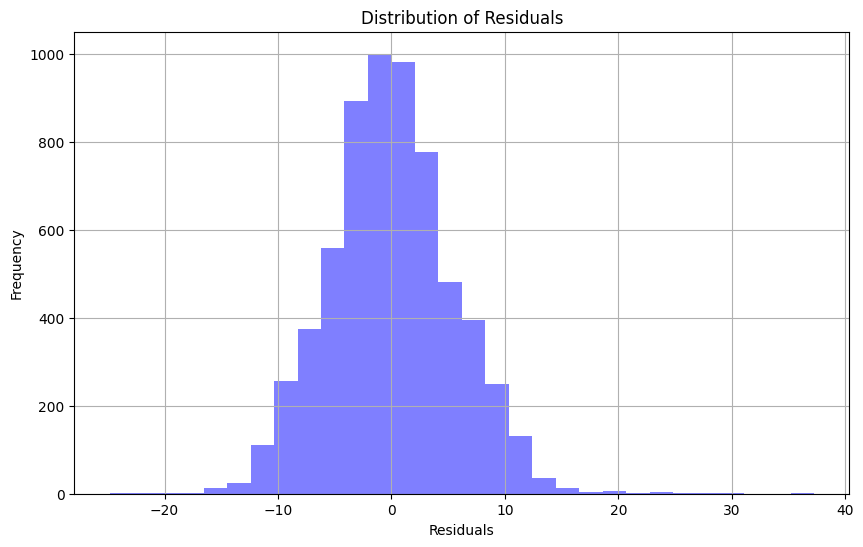

In [58]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.5)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

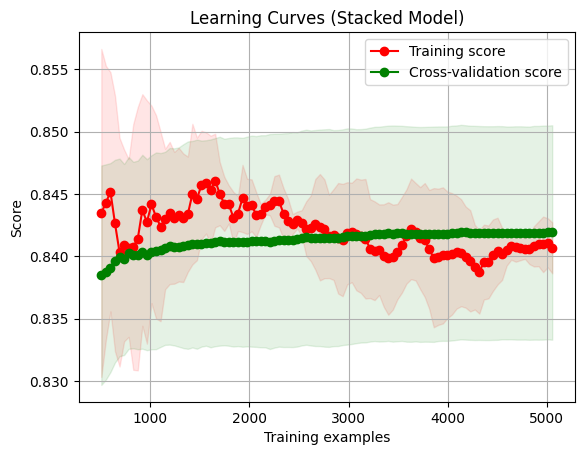

In [60]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit

X = stacked_X_train 
y = y_test 

model = meta_learner

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 100)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

plot_learning_curve(model, "Learning Curves (Stacked Model)", X, y, cv=cv, n_jobs=-1)

plt.show()

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression

X = combined_data.drop(columns=['Habitability_score']) 
y = combined_data['Habitability_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

rf_model = RandomForestRegressor(max_depth=13, min_samples_leaf=1, min_samples_split=3, n_estimators=225)
xgb_model = XGBRegressor(max_depth=9, learning_rate=0.02604558902421067, n_estimators=246)
et_model = ExtraTreesRegressor(max_depth=17, min_samples_leaf=1, min_samples_split=9, n_estimators=260)

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
et_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_valid)
xgb_preds = xgb_model.predict(X_valid)
et_preds = et_model.predict(X_valid)

stacked_X_train = np.column_stack((rf_preds, xgb_preds, et_preds))

meta_learner = LinearRegression()
meta_learner.fit(stacked_X_train, y_valid)

rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
et_preds = et_model.predict(X_test)

stacked_X_train = np.column_stack((rf_preds, xgb_preds, et_preds))

stacked_preds = meta_learner.predict(stacked_X_train)

mse_stacked = root_mean_squared_error(y_test, stacked_preds)
print("Root Mean Squared Error (Stacked Model):", mse_stacked)


Root Mean Squared Error (Stacked Model): 5.340585431143624


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler

X = combined_data.drop(columns=['Habitability_score']) 
y = combined_data['Habitability_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(max_depth=13, min_samples_leaf=1, min_samples_split=3, n_estimators=225)
xgb_model = XGBRegressor(max_depth=9, learning_rate=0.02604558902421067, n_estimators=246)
et_model = ExtraTreesRegressor(max_depth=17, min_samples_leaf=1, min_samples_split=9, n_estimators=260)

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
et_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_valid)
xgb_preds = xgb_model.predict(X_valid)
et_preds = et_model.predict(X_valid)

stacked_X_train = np.column_stack((rf_preds, xgb_preds, et_preds))

# Initialize the scaler
scaler = StandardScaler()

# Scale the stacked features
stacked_X_train_scaled = scaler.fit_transform(stacked_X_train)

# Initialize the meta-learner with L1 (Lasso) or L2 (Ridge) regularization
# Change alpha value for desired regularization strength
meta_learner = Lasso(alpha=0.001)  # L1 (Lasso) regularization
# meta_learner = Ridge(alpha=0.001)  # L2 (Ridge) regularization

meta_learner.fit(stacked_X_train_scaled, y_valid)

rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
et_preds = et_model.predict(X_test)

stacked_X_test = np.column_stack((rf_preds, xgb_preds, et_preds))
stacked_X_test_scaled = scaler.fit_transform(stacked_X_test)
stacked_preds = meta_learner.predict(stacked_X_test_scaled)

mse_stacked = root_mean_squared_error(y_test, stacked_preds)
print("Root Mean Squared Error (Regularized Stacked Model):", mse_stacked)


Root Mean Squared Error (Regularized Stacked Model): 5.337610270491664


0.01
5.441298888367422
5.450131599163173
5.445782653317743
5.447213260226816

0.05
5.441518320185258
5.446378518814346
5.447444319680532
5.44841918152422

0.2
5.44942107874101
5.448722431201614
5.4485838330480085
5.44874293165618

0.001
5.4420358682609296
5.443895790043081
5.446682242194277
5.4430436638250415


In [154]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

# Base models
rf_model = RandomForestRegressor(max_depth=13, min_samples_leaf=1, min_samples_split=3, n_estimators=225)
xgb_model = XGBRegressor(max_depth=9, learning_rate=0.02604558902421067, n_estimators=246)
et_model = ExtraTreesRegressor(max_depth=17, min_samples_leaf=1, min_samples_split=9, n_estimators=260)

# Train base models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
et_model.fit(X_train, y_train)

# Generate predictions from base models
rf_preds = rf_model.predict(X_valid)
xgb_preds = xgb_model.predict(X_valid)
et_preds = et_model.predict(X_valid)

# Stack the predictions from base models
stacked_X_train = np.column_stack((rf_preds, xgb_preds, et_preds))

# Train the XGBoost model as the meta-learner
xgb_meta_learner = XGBRegressor(max_depth=1, learning_rate=0.08659195741852954, n_estimators=154)
xgb_meta_learner.fit(stacked_X_train, y_valid)

rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
et_preds = et_model.predict(X_test)

stacked_X_test = np.column_stack((rf_preds, xgb_preds, et_preds))

# Generate predictions from the stacked model
stacked_preds = xgb_meta_learner.predict(stacked_X_test)

# Calculate Root Mean Squared Error
mse_stacked = root_mean_squared_error(y_test, stacked_preds)
print("Root Mean Squared Error (Stacked Model):", mse_stacked)


Root Mean Squared Error (Stacked Model): 5.396402983487445


3.8638203670180236

split 0.4 : 5.469199633458365, 5.536456917881298

split 0.2 : 4.6515420542343024

In [126]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error
from scipy.stats import randint, uniform

# Split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Base models
rf_model = RandomForestRegressor(max_depth=13, min_samples_leaf=1, min_samples_split=3, n_estimators=225)
xgb_model = XGBRegressor(max_depth=9, learning_rate=0.02604558902421067, n_estimators=246)
et_model = ExtraTreesRegressor(max_depth=17, min_samples_leaf=1, min_samples_split=9, n_estimators=260)

# Train base models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
et_model.fit(X_train, y_train)

# Generate predictions from base models on the validation set
rf_preds_val = rf_model.predict(X_valid)
xgb_preds_val = xgb_model.predict(X_valid)
et_preds_val = et_model.predict(X_valid)

# Stack the predictions from base models for validation
stacked_X_train = np.column_stack((rf_preds_val, xgb_preds_val, et_preds_val))

# Define the parameters for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(1, 20),
    'learning_rate': uniform(0.01, 0.3)
}

# Create the XGBoost model
xgb_meta_learner = XGBRegressor()

# Perform RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(estimator=xgb_meta_learner, param_distributions=param_dist, n_iter=1000, cv=3, random_state=42, verbose=3, n_jobs=-1)
xgb_random_search.fit(stacked_X_train, y_valid)

# Get the best model from RandomizedSearchCV
best_xgb_meta_learner = xgb_random_search.best_estimator_

# Generate predictions from base models on the test set
rf_preds_test = rf_model.predict(X_test)
xgb_preds_test = xgb_model.predict(X_test)
et_preds_test = et_model.predict(X_test)

# Stack the predictions from base models for test
stacked_X_test = np.column_stack((rf_preds_test, xgb_preds_test, et_preds_test))

# Generate predictions from the stacked model
stacked_preds = best_xgb_meta_learner.predict(stacked_X_test)

# Calculate Root Mean Squared Error
mse_stacked = root_mean_squared_error(y_test, stacked_preds)
print("Root Mean Squared Error (Stacked Model):", mse_stacked)


Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
Root Mean Squared Error (Stacked Model): 5.536981704092682


In [127]:
print("\nBest hyperparameters for XGBoost:")
print(xgb_random_search.best_params_)


Best hyperparameters for XGBoost:
{'learning_rate': 0.08659195741852954, 'max_depth': 1, 'n_estimators': 154}


In [101]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import root_mean_squared_error

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base models
rf_model = RandomForestRegressor(max_depth=13, min_samples_leaf=1, min_samples_split=3, n_estimators=225)
xgb_model = XGBRegressor(max_depth=9, learning_rate=0.02604558902421067, n_estimators=246)
et_model = ExtraTreesRegressor(max_depth=17, min_samples_leaf=1, min_samples_split=9, n_estimators=260)

# Train base models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
et_model.fit(X_train, y_train)

# Generate predictions from base models
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
et_preds = et_model.predict(X_test)

# Stack the predictions from base models
stacked_X_train = np.column_stack((rf_preds, xgb_preds, et_preds))

# Initialize the scaler
scaler = StandardScaler()

# Scale the stacked features
stacked_X_train_scaled = scaler.fit_transform(stacked_X_train)

# Train the AdaBoost model as the meta-learner
ada_meta_learner = AdaBoostRegressor()
ada_meta_learner.fit(stacked_X_train_scaled, y_test)

# Generate predictions from the stacked model
stacked_preds = ada_meta_learner.predict(stacked_X_train_scaled)

# Calculate Root Mean Squared Error
mse_stacked = root_mean_squared_error(y_test, stacked_preds)
print("Root Mean Squared Error (Stacked Model):", mse_stacked)


Root Mean Squared Error (Stacked Model): 5.756928882015642


In [161]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=42)

# Base models
rf_model = RandomForestRegressor(max_depth=13, min_samples_leaf=1, min_samples_split=3, n_estimators=225)
xgb_model = XGBRegressor(max_depth=9, learning_rate=0.02604558902421067, n_estimators=246)
et_model = ExtraTreesRegressor(max_depth=17, min_samples_leaf=1, min_samples_split=9, n_estimators=260)

# Train base models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
et_model.fit(X_train, y_train)

# Generate predictions from base models
rf_preds = rf_model.predict(X_valid)
xgb_preds = xgb_model.predict(X_valid)
et_preds = et_model.predict(X_valid)

# Stack the predictions from base models
stacked_X_train = np.column_stack((rf_preds, xgb_preds, et_preds))

# Train the GBM model as the meta-learner
# gbm_meta_learner = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
gbm_meta_learner = GradientBoostingRegressor(learning_rate=0.079535077086805, max_depth=1, min_samples_leaf=1, min_samples_split=6, n_estimators=236)
gbm_meta_learner.fit(stacked_X_train, y_valid)

rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
et_preds = et_model.predict(X_test)

stacked_X_test = np.column_stack((rf_preds, xgb_preds, et_preds))

# Generate predictions from the stacked model
stacked_preds = gbm_meta_learner.predict(stacked_X_test)

# Calculate Root Mean Squared Error
mse_stacked = root_mean_squared_error(y_test, stacked_preds)
print("Root Mean Squared Error (Stacked Model):", mse_stacked)


Root Mean Squared Error (Stacked Model): 5.405253720397597


split 0.2 : 4.549375963427287

split 0.4 : 5.322066511583906

In [135]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error
from scipy.stats import randint, uniform

# Split the data into train, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

# Base models
rf_model = RandomForestRegressor(max_depth=13, min_samples_leaf=1, min_samples_split=3, n_estimators=225)
xgb_model = XGBRegressor(max_depth=9, learning_rate=0.02604558902421067, n_estimators=246)
et_model = ExtraTreesRegressor(max_depth=17, min_samples_leaf=1, min_samples_split=9, n_estimators=260)

# Train base models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
et_model.fit(X_train, y_train)

# Generate predictions from base models on the validation set
rf_preds_val = rf_model.predict(X_valid)
xgb_preds_val = xgb_model.predict(X_valid)
et_preds_val = et_model.predict(X_valid)

# Stack the predictions from base models for validation
stacked_X_train = np.column_stack((rf_preds_val, xgb_preds_val, et_preds_val))

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 300),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Create the Gradient Boosting meta-learner
gbm_meta_learner = GradientBoostingRegressor()

# Perform RandomizedSearchCV for hyperparameter tuning
gbm_random_search = RandomizedSearchCV(estimator=gbm_meta_learner, param_distributions=param_dist, n_iter=1000, cv=3, random_state=42, verbose=10, n_jobs=-1)
gbm_random_search.fit(stacked_X_train, y_valid)

# Get the best model from RandomizedSearchCV
best_gbm_meta_learner = gbm_random_search.best_estimator_

# Generate predictions from base models on the test set
rf_preds_test = rf_model.predict(X_test)
xgb_preds_test = xgb_model.predict(X_test)
et_preds_test = et_model.predict(X_test)

# Stack the predictions from base models for test
stacked_X_test = np.column_stack((rf_preds_test, xgb_preds_test, et_preds_test))

# Generate predictions from the stacked model
stacked_preds = best_gbm_meta_learner.predict(stacked_X_test)

# Calculate Root Mean Squared Error
mse_stacked = root_mean_squared_error(y_test, stacked_preds)
print("Root Mean Squared Error (Stacked Model):", mse_stacked)


Fitting 3 folds for each of 1000 candidates, totalling 3000 fits
Root Mean Squared Error (Stacked Model): 5.527330113951553


In [136]:
print("\nBest hyperparameters for XGBoost:")
print(gbm_random_search.best_params_)


Best hyperparameters for XGBoost:
{'learning_rate': 0.079535077086805, 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 236}


In [122]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import root_mean_squared_error

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Base models
rf_model = RandomForestRegressor(max_depth=13, min_samples_leaf=1, min_samples_split=3, n_estimators=225)
xgb_model = XGBRegressor(max_depth=9, learning_rate=0.02604558902421067, n_estimators=246)
et_model = ExtraTreesRegressor(max_depth=17, min_samples_leaf=1, min_samples_split=9, n_estimators=260)

# Train base models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
et_model.fit(X_train, y_train)

# Generate predictions from base models
rf_preds = rf_model.predict(X_valid)
xgb_preds = xgb_model.predict(X_valid)
et_preds = et_model.predict(X_valid)

# Stack the predictions from base models
stacked_X_train = np.column_stack((rf_preds, xgb_preds, et_preds))

# Train the LightGBM model as the meta-learner
# lgbm_meta_learner = LGBMRegressor(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=100, subsample_for_bin=200000, objective=None, class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, reg_lambda=0.0, random_state=None, n_jobs=-1, silent=True, importance_type='split')
lgbm_meta_learner = LGBMRegressor()
lgbm_meta_learner.fit(stacked_X_train, y_valid)

rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
et_preds = et_model.predict(X_test)

stacked_X_test = np.column_stack((rf_preds, xgb_preds, et_preds))

# Generate predictions from the stacked model
stacked_preds = lgbm_meta_learner.predict(stacked_X_test)

# Calculate Root Mean Squared Error
mse_stacked = root_mean_squared_error(y_test, stacked_preds)
print("Root Mean Squared Error (Stacked Model):", mse_stacked)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 15799, number of used features: 3
[LightGBM] [Info] Start training from score 73.350541
Root Mean Squared Error (Stacked Model): 5.3713373900289785


split 0.2 : 4.580432714293584

split 0.4 : 5.3713373900289785

In [170]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_train)

# Assign cluster labels to train and test data
X_train_clustered = np.column_stack((X_train, cluster_labels))

# Base models
rf_model = RandomForestRegressor(max_depth=13, min_samples_leaf=1, min_samples_split=3, n_estimators=225)
xgb_model = XGBRegressor(max_depth=9, learning_rate=0.02604558902421067, n_estimators=246)
et_model = ExtraTreesRegressor(max_depth=17, min_samples_leaf=1, min_samples_split=9, n_estimators=260)

# Fit models
rf_model.fit(X_train_clustered, y_train)
xgb_model.fit(X_train_clustered, y_train)
et_model.fit(X_train_clustered, y_train)

# Predictions on test set
cluster_labels_valid = kmeans.predict(X_valid)
X_valid_clustered = np.column_stack((X_valid, cluster_labels_valid))
rf_preds = rf_model.predict(X_valid_clustered)
xgb_preds = xgb_model.predict(X_valid_clustered)
et_preds = et_model.predict(X_valid_clustered)

# Stacked model training
stacked_X_valid = np.column_stack((rf_preds, xgb_preds, et_preds))
meta_learner = GradientBoostingRegressor(learning_rate=0.079535077086805, max_depth=1, min_samples_leaf=1, min_samples_split=6, n_estimators=236)
meta_learner.fit(stacked_X_valid, y_valid)

cluster_labels_test = kmeans.predict(X_test)
X_test_clustered = np.column_stack((X_test, cluster_labels_test))
rf_preds = rf_model.predict(X_test_clustered)
xgb_preds = xgb_model.predict(X_test_clustered)
et_preds = et_model.predict(X_test_clustered)

# Stacked model training
stacked_X_test = np.column_stack((rf_preds, xgb_preds, et_preds))

# Stacked model predictions
stacked_preds = meta_learner.predict(stacked_X_test)

# Evaluation
mse_stacked = root_mean_squared_error(y_test, stacked_preds)
print("Root Mean Squared Error (Stacked Model with Clustering):", mse_stacked)


Root Mean Squared Error (Stacked Model with Clustering): 4.604331278362582


split 0.2 : 4.638145080637082
split 0.4 : 5.343593351479196

In [32]:
combined_test.head()

,Property_Type,Property_Area,Number_of_Doors,Power_Backup,Water_Supply,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Number_of_Windows,Furnishing,Frequency_of_Powercuts,Crime_Rate,Dust_and_Noise
0,5.0,1521,1,1.0,0.0,7.61,156.0,4.71,5.0,2.0,0.0,3.0,2.0
1,5.0,2233,1,1.0,3.0,5.28,82.0,4.50,2.0,1.0,0.0,3.0,2.0
2,1.0,986,1,1.0,0.0,7.72,91.0,4.79,1.0,2.0,0.0,3.0,2.0
3,5.0,1625,1,1.0,2.0,6.19,159.0,4.09,2.0,1.0,0.0,3.0,2.0
4,5.0,1166,2,1.0,2.0,5.84,82.0,3.56,2.0,0.0,0.0,1.0,2.0


In [37]:
import pandas as pd

# Assuming test_data contains the test dataset without the 'Id' column
test_data = combined_test.drop(columns=['Habitability_score'])
test1 = pd.read_csv("test.csv")


# Make predictions on the test data using base models
rf_preds = rf_model.predict(test_data)
xgb_preds = xgb_model.predict(test_data)
et_preds = et_model.predict(test_data)

# Create stacked dataset
stacked_test_data = np.column_stack((rf_preds, xgb_preds, et_preds))

# Initialize the scaler
scaler = StandardScaler()

# Scale the stacked features
stacked_test_data_scaled = scaler.fit_transform(stacked_test_data)

# Make predictions on the stacked test data using meta-learner
stacked_preds = meta_learner.predict(stacked_test_data_scaled)

# Add the predictions to the test_data DataFrame
test_data['Habitability_score'] = stacked_preds

# Create a new DataFrame with 'Id' and 'Habitability_score' columns
predictions_df = pd.DataFrame({'Id': test1['Id'], 'Habitability_score': test_data['Habitability_score']})

# Write the predictions to a new CSV file
predictions_df.to_csv("predicted_test22.csv", index=False)

In [60]:
import pandas as pd

# Assuming test_data contains the test dataset without the 'Id' column
test_data = combined_test.drop(columns=['Habitability_score'])
test1 = pd.read_csv("test.csv")

# Perform clustering on the test dataset
cluster_labels_test = kmeans.predict(test_data)

# Assign cluster labels to test data
test_data_clustered = np.column_stack((test_data, cluster_labels_test))

# Make predictions on the test data using base models
rf_preds = rf_model.predict(test_data_clustered)
xgb_preds = xgb_model.predict(test_data_clustered)
et_preds = et_model.predict(test_data_clustered)

# Create stacked dataset
stacked_test_data = np.column_stack((rf_preds, xgb_preds, et_preds))

# Make predictions on the stacked test data using meta-learner
stacked_preds = meta_learner.predict(stacked_test_data)

# Add the predictions to the test_data DataFrame
test_data['Habitability_score'] = stacked_preds

# Create a new DataFrame with 'Id' and 'Habitability_score' columns
predictions_df = pd.DataFrame({'Id': test1['Id'], 'Habitability_score': test_data['Habitability_score']})

# Write the predictions to a new CSV file
predictions_df.to_csv("predicted_test23.csv", index=False)

In [ ]:
import pandas as pd

# Assuming test_data contains the test dataset without the 'Id' column
test_data = combined_test.drop(columns=['Habitability_score'])
test1 = pd.read_csv("test.csv")

# Perform clustering on the test dataset (if clustering was used in training)
cluster_labels_test = kmeans.predict(test_data)
test_data_clustered = np.column_stack((test_data, cluster_labels_test))

# Make predictions on the test data using base models
rf_preds = rf_model.predict(test_data_clustered)
xgb_preds = xgb_model.predict(test_data_clustered)
et_preds = et_model.predict(test_data_clustered)

# Create stacked dataset
stacked_test_data = np.column_stack((rf_preds, xgb_preds, et_preds))

# Make predictions on the stacked test data using meta-learner
stacked_preds = meta_learner.predict(stacked_test_data)

# Create a new DataFrame with 'Id' and 'Habitability_score' columns
predictions_df = pd.DataFrame({'Id': test1['Id'], 'Habitability_score': stacked_preds})

# Write the predictions to a new CSV file
predictions_df.to_csv("predicted_test.csv", index=False)


Given below are the other evaluation metrics obtained from the stacked model.

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, explained_variance_score

mae_stacked = mean_absolute_error(y_test, stacked_preds)
rmse_stacked = mean_squared_error(y_test, stacked_preds)
r2_stacked = r2_score(y_test, stacked_preds)
mape_stacked = mean_absolute_percentage_error(y_test, stacked_preds)
explained_variance_stacked = explained_variance_score(y_test, stacked_preds)

print("Mean Absolute Error (Stacked Model):", mae_stacked)
print("Mean Squared Error (Stacked Model):", rmse_stacked)
print("R-squared (Stacked Model):", r2_stacked)
print("Mean Absolute Percentage Error (Stacked Model):", mape_stacked)
print("Explained Variance Score (Stacked Model):", explained_variance_stacked)

Mean Absolute Error (Stacked Model): 4.269806787596459
Mean Squared Error (Stacked Model): 29.64312091197013
R-squared (Stacked Model): 0.8441085933194807
Mean Absolute Percentage Error (Stacked Model): 0.06369789291443911
Explained Variance Score (Stacked Model): 0.8441085933194807


Below code will visualize where the error value is comming from. It will show the variation between predicted value and actual values for target variable.

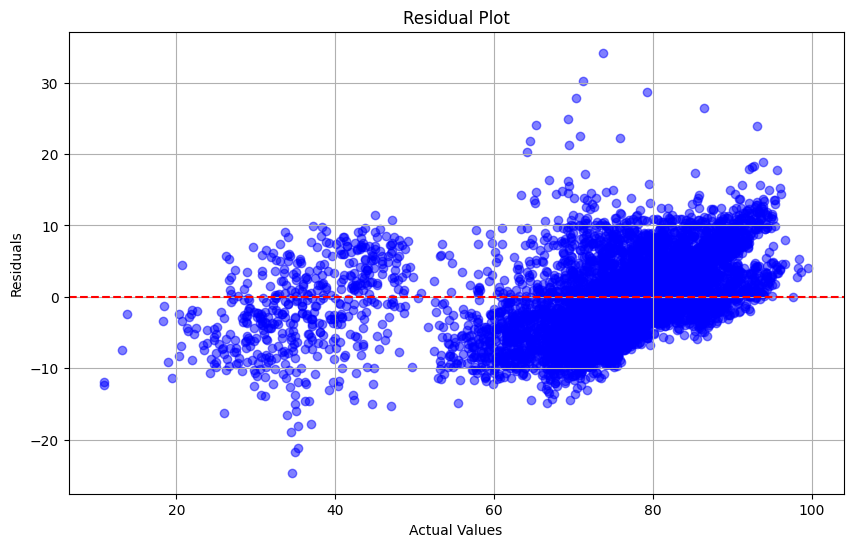

In [40]:
import matplotlib.pyplot as plt

residuals = y_test - stacked_preds

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

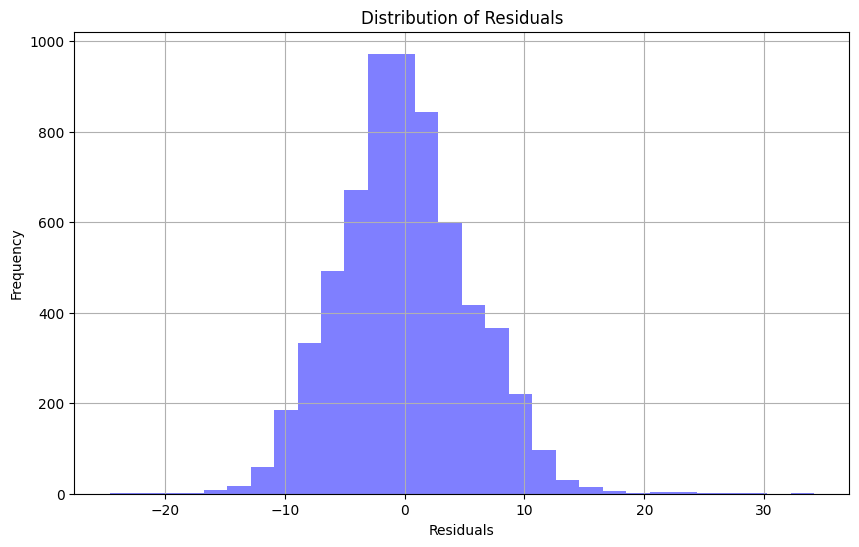

In [41]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.5)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

For the model we can further improve the performance by Hyper Parameter tuning

In [76]:
from sklearn.model_selection import GridSearchCV

X = combined_data.drop(columns=['Habitability_score'])
y = combined_data['Habitability_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

et_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(estimator=RandomForestRegressor(), param_grid=rf_param_grid, scoring='neg_mean_squared_error', cv=3, verbose= 2)
xgb_grid = GridSearchCV(estimator=XGBRegressor(), param_grid=xgb_param_grid, scoring='neg_mean_squared_error', cv=3, verbose= 2)
et_grid = GridSearchCV(estimator=ExtraTreesRegressor(), param_grid=et_param_grid, scoring='neg_mean_squared_error', cv=3, verbose= 2)

rf_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)
et_grid.fit(X_train, y_train)

best_rf_model = rf_grid.best_estimator_
best_xgb_model = xgb_grid.best_estimator_
best_et_model = et_grid.best_estimator_

rf_preds = best_rf_model.predict(X_test)
xgb_preds = best_xgb_model.predict(X_test)
et_preds = best_et_model.predict(X_test)

stacked_X_train = np.column_stack((rf_preds, xgb_preds, et_preds))

meta_param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

meta_grid = GridSearchCV(estimator=LinearRegression(), param_grid=meta_param_grid, scoring='neg_mean_squared_error', cv=3, verbose= 2)
meta_grid.fit(stacked_X_train, y_test)

best_meta_learner = meta_grid.best_estimator_

stacked_preds = best_meta_learner.predict(stacked_X_train)

mse_stacked_tuned = mean_squared_error(y_test, stacked_preds)
print("Mean Squared Error (Tuned Stacked Model):", mse_stacked_tuned)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  14.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  14.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  16.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  30.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  28.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  29.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  44.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  41.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  43.9s
[CV] END ma

In [77]:
print("Best hyperparameters for Random Forest:")
print(rf_grid.best_params_)

print("\nBest hyperparameters for XGBoost:")
print(xgb_grid.best_params_)

print("\nBest hyperparameters for Extra Trees:")
print(et_grid.best_params_)


Best hyperparameters for Random Forest:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

Best hyperparameters for XGBoost:
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}

Best hyperparameters for Extra Trees:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


Best hyperparameters for Random Forest:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Best hyperparameters for XGBoost:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}

Best hyperparameters for Extra Trees:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

Best hyperparameters for Random Forest:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

Best hyperparameters for XGBoost:
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}

Best hyperparameters for Extra Trees:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

stacked_X_train = np.column_stack((rf_preds, xgb_preds, et_preds))

meta_param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

meta_grid = GridSearchCV(estimator=LinearRegression(), param_grid=meta_param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2)
meta_grid.fit(stacked_X_train, y_test)

best_meta_learner = meta_grid.best_estimator_

stacked_preds = best_meta_learner.predict(stacked_X_train)

mse_stacked_tuned = root_mean_squared_error(y_test, stacked_preds)
print("Root Mean Squared Error (Tuned Stacked Model):", mse_stacked_tuned)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ..................fit_intercept=True, positive=True; total time=   0.0s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.0s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.0s
[CV] END .................fit_intercept=True, positive=False; total time=   0.0s
[CV] END .................fit_intercept=True, positive=False; total time=   0.0s
[CV] END .................fit_intercept=True, positive=False; total time=   0.0s
[CV] END .................fit_intercept=False, positive=True; total time=   0.0s
[CV] END .................fit_intercept=False, positive=True; total time=   0.0s
[CV] END .................fit_intercept=False, positive=True; total time=   0.0s
[CV] END ................fit_intercept=False, positive=False; total time=   0.0s
[CV] END ................fit_intercept=False, positive=False; total time=   0.0s
[CV] END ................fit_intercept=False, pos

Hyper Parameter Tuning does improve the performance slightly.

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, explained_variance_score

mae_stacked = mean_absolute_error(y_test, stacked_preds)
rmse_stacked = mean_squared_error(y_test, stacked_preds)
r2_stacked = r2_score(y_test, stacked_preds)
mape_stacked = mean_absolute_percentage_error(y_test, stacked_preds)
explained_variance_stacked = explained_variance_score(y_test, stacked_preds)

print("Mean Absolute Error (Stacked Model):", mae_stacked)
print("Mean Squared Error (Stacked Model):", rmse_stacked)
print("R-squared (Stacked Model):", r2_stacked)
print("Mean Absolute Percentage Error (Stacked Model):", mape_stacked)
print("Explained Variance Score (Stacked Model):", explained_variance_stacked)

Mean Absolute Error (Stacked Model): 4.277187041874119
Mean Squared Error (Stacked Model): 29.82724953019514
R-squared (Stacked Model): 0.8431402718869812
Mean Absolute Percentage Error (Stacked Model): 0.06385901323930843
Explained Variance Score (Stacked Model): 0.8431402746544484


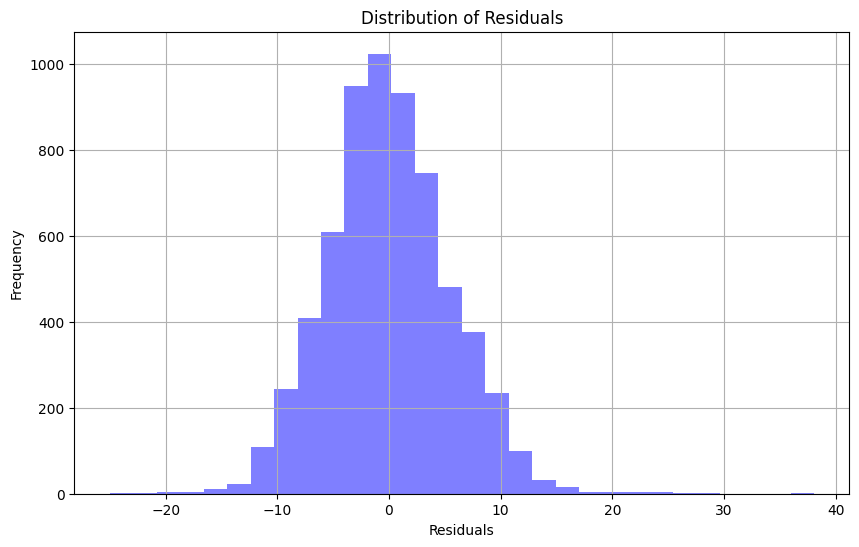

In [80]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.5)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Below code will help in understanding whether the model is overfitting or underfitting. As both curves are very close to each other that means the model performes well to unseen data. But since both curves are giving a very low score we can assume this model is underfitting.

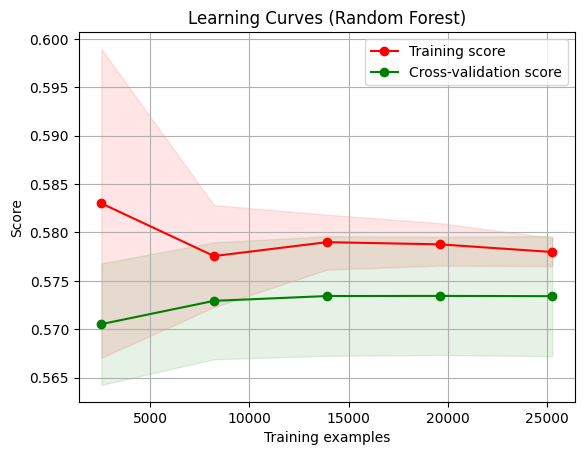

In [43]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit

X = combined_data.drop(columns=['Habitability_score'])
y = combined_data['Habitability_score']

model = meta_learner

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

plot_learning_curve(model, "Learning Curves (Random Forest)", X, y, cv=cv, n_jobs=-1)

plt.show()

We will next try out an even larger stacked model with 5 seperate models. One of them is not tree based so we will scale the data for that model. The choice behind selecting these 5 models will be dicussed in a later trial.

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xs_train = scaler.fit_transform(X_train)

Xs_train = pd.DataFrame(Xs_train, columns=X_train.columns)
Xs_test = scaler.fit_transform(X_test)
Xs_test = pd.DataFrame(Xs_test, columns=X_test.columns)

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

X = combined_data.drop(columns=['Habitability_score'])  
y = combined_data['Habitability_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
Xs_train = scaler.fit_transform(X_train)
Xs_train = pd.DataFrame(Xs_train, columns=X_train.columns)

Xs_test = scaler.fit_transform(X_test)
Xs_test = pd.DataFrame(Xs_test, columns=X_test.columns)

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

et_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

svr_param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.01, 0.001]
}

dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(estimator=RandomForestRegressor(), param_grid=rf_param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2)
xgb_grid = GridSearchCV(estimator=XGBRegressor(), param_grid=xgb_param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2)
et_grid = GridSearchCV(estimator=ExtraTreesRegressor(), param_grid=et_param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2)
svr_grid = GridSearchCV(estimator=SVR(), param_grid=svr_param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2)
dt_grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=dt_param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2)

rf_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)
et_grid.fit(X_train, y_train)
svr_grid.fit(Xs_train, y_train)
dt_grid.fit(X_train, y_train)

best_rf_model = rf_grid.best_estimator_
best_xgb_model = xgb_grid.best_estimator_
best_et_model = et_grid.best_estimator_
best_svr_model = svr_grid.best_estimator_
best_dt_model = dt_grid.best_estimator_

rf_preds = best_rf_model.predict(X_test)
xgb_preds = best_xgb_model.predict(X_test)
et_preds = best_et_model.predict(X_test)
svr_preds = best_svr_model.predict(Xs_test)
dt_preds = best_dt_model.predict(X_test)

stacked_X_train = np.column_stack((rf_preds, xgb_preds, et_preds, svr_preds, dt_preds))

meta_param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

meta_grid = GridSearchCV(estimator=LinearRegression(), param_grid=meta_param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2)
meta_grid.fit(stacked_X_train, y_test)

best_meta_learner = meta_grid.best_estimator_

stacked_preds = best_meta_learner.predict(stacked_X_train)

mse_stacked_tuned = mean_squared_error(y_test, stacked_preds)
print("Mean Squared Error (Tuned Stacked Model):", mse_stacked_tuned)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  16.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  30.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  28.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  29.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  43.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  43.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  44.4s
[CV] END ma

Again as you can see we were able to gain a small improvement in the MSE score.

In [86]:
print("Best hyperparameters for Random Forest:")
print(rf_grid.best_params_)

print("\nBest hyperparameters for XGBoost:")
print(xgb_grid.best_params_)

print("\nBest hyperparameters for Extra Trees:")
print(et_grid.best_params_)

print("\nBest hyperparameters for SVR:")
print(svr_grid.best_params_)

print("\nBest hyperparameters for Decision Tree:")
print(dt_grid.best_params_)

Best hyperparameters for Random Forest:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

Best hyperparameters for XGBoost:
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}

Best hyperparameters for Extra Trees:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}

Best hyperparameters for SVR:
{'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}

Best hyperparameters for Decision Tree:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


Best hyperparameters for Random Forest:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

Best hyperparameters for XGBoost:
{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}

Best hyperparameters for Extra Trees:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}

Best hyperparameters for SVR:
{'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}

Best hyperparameters for Decision Tree:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

stacked_X_train = np.column_stack((rf_preds, xgb_preds, et_preds, svr_preds, dt_preds))

meta_param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

meta_grid = GridSearchCV(estimator=LinearRegression(), param_grid=meta_param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2)
meta_grid.fit(stacked_X_train, y_test)

best_meta_learner = meta_grid.best_estimator_

stacked_preds = best_meta_learner.predict(stacked_X_train)

mse_stacked_tuned = mean_squared_error(y_test, stacked_preds)
print("Mean Squared Error (Tuned Stacked Model):", mse_stacked_tuned)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ..................fit_intercept=True, positive=True; total time=   0.0s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.0s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.0s
[CV] END .................fit_intercept=True, positive=False; total time=   0.0s
[CV] END .................fit_intercept=True, positive=False; total time=   0.0s
[CV] END .................fit_intercept=True, positive=False; total time=   0.0s
[CV] END .................fit_intercept=False, positive=True; total time=   0.0s
[CV] END .................fit_intercept=False, positive=True; total time=   0.0s
[CV] END .................fit_intercept=False, positive=True; total time=   0.0s
[CV] END ................fit_intercept=False, positive=False; total time=   0.0s
[CV] END ................fit_intercept=False, positive=False; total time=   0.0s
[CV] END ................fit_intercept=False, pos

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression

# Your dataset
X = combined_data.drop(columns=['Habitability_score']) 
y = combined_data['Habitability_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
Xs_train = scaler.fit_transform(X_train)
Xs_train = pd.DataFrame(Xs_train, columns=X_train.columns)

Xs_test = scaler.fit_transform(X_test)
Xs_test = pd.DataFrame(Xs_test, columns=X_test.columns)

# Best hyperparameters for Random Forest
rf_params = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
rf_model = RandomForestRegressor(**rf_params)

# Best hyperparameters for XGBoost
xgb_params = {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
xgb_model = XGBRegressor(**xgb_params)

# Best hyperparameters for Extra Trees
et_params = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
et_model = ExtraTreesRegressor(**et_params)

# Best hyperparameters for SVR
svr_params = {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
svr_model = SVR(**svr_params)

# Best hyperparameters for Decision Tree
dt_params = {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
dt_model = DecisionTreeRegressor(**dt_params)

# Fitting the models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
et_model.fit(X_train, y_train)
svr_model.fit(Xs_train, y_train)
dt_model.fit(X_train, y_train)

# Predictions
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
et_preds = et_model.predict(X_test)
svr_preds = svr_model.predict(Xs_test)
dt_preds = dt_model.predict(X_test)

# Stacked dataset
stacked_X_train = np.column_stack((rf_preds, xgb_preds, et_preds, svr_preds, dt_preds))

# Meta-learner
meta_learner = LinearRegression()
meta_learner.fit(stacked_X_train, y_test)

# Stacked predictions
stacked_preds = meta_learner.predict(stacked_X_train)

# Evaluation
mse_stacked = root_mean_squared_error(y_test, stacked_preds)
print("Root Mean Squared Error (Stacked Model):", mse_stacked)


Root Mean Squared Error (Stacked Model): 5.4452451093356755


In [64]:
# Check column names in the training dataset
print("Training dataset column names:", combined_data.columns)

# Check column names in the test dataset
print("Test dataset column names:", combined_test.columns)


Training dataset column names: Index(['Property_Type', 'Property_Area', 'Number_of_Doors', 'Power_Backup',
       'Water_Supply', 'Traffic_Density_Score', 'Air_Quality_Index',
       'Neighborhood_Review', 'Habitability_score', 'Number_of_Windows',
       'Furnishing', 'Frequency_of_Powercuts', 'Crime_Rate', 'Dust_and_Noise'],
      dtype='object')
Test dataset column names: Index(['Property_Type', 'Property_Area', 'Number_of_Doors', 'Power_Backup',
       'Water_Supply', 'Traffic_Density_Score', 'Air_Quality_Index',
       'Neighborhood_Review', 'Number_of_Windows', 'Furnishing',
       'Frequency_of_Powercuts', 'Crime_Rate', 'Dust_and_Noise'],
      dtype='object')


In [65]:
import pandas as pd

# Assuming test_data contains the test dataset without the 'Id' column
test_data = combined_test
test1 = pd.read_csv("test.csv")

scaler = StandardScaler()
testS = scaler.fit_transform(combined_test)
testS = pd.DataFrame(testS, columns=combined_test.columns)

# Make predictions on the test data using base models
rf_preds = rf_model.predict(test_data)
xgb_preds = xgb_model.predict(test_data)
et_preds = et_model.predict(test_data)
svr_preds = svr_model.predict(testS)
dt_preds = dt_model.predict(test_data)

# Create stacked dataset
stacked_test_data = np.column_stack((rf_preds, xgb_preds, et_preds, svr_preds, dt_preds))

# Make predictions on the stacked test data using meta-learner
stacked_preds = meta_learner.predict(stacked_test_data)

# Add the predictions to the test_data DataFrame
test_data['Habitability_score'] = stacked_preds

test_data.head()

# Create a new DataFrame with 'Id' and 'Habitability_score' columns
predictions_df = pd.DataFrame({'Id': test1['Id'], 'Habitability_score': test_data['Habitability_score']})

# Write the predictions to a new CSV file
predictions_df.to_csv("predicted_test8.csv", index=False)

## TRIAL 03 - Removing Outliers

I found out that Regression models are too sensitive to outliers in the dataset. So we will try to handle them in this trial.

In [35]:
import numpy as np

z_scores = (combined_data - combined_data.mean()) / combined_data.std()

z_threshold = 3 
outliers_z_score = (z_scores > z_threshold) | (z_scores < -z_threshold)

Q1 = combined_data.quantile(0.25)
Q3 = combined_data.quantile(0.75)
IQR = Q3 - Q1

iqr_threshold = 1.5
outliers_iqr = (combined_data < (Q1 - iqr_threshold * IQR)) | (combined_data > (Q3 + iqr_threshold * IQR))
outliers_combined = outliers_z_score | outliers_iqr
outliers_count = outliers_combined.sum()

print("Number of outliers for each feature:")
print(outliers_count)

Number of outliers for each feature:
Property_Type                0
Property_Area             1372
Number_of_Doors            724
Power_Backup              7803
Water_Supply                 0
Traffic_Density_Score      447
Air_Quality_Index          628
Neighborhood_Review        554
Habitability_score        2672
Number_of_Windows         1648
Furnishing                   0
Frequency_of_Powercuts     987
Crime_Rate                   0
Dust_and_Noise            4478
dtype: int64


We will modify the dataset to keep values between 0.1 - 0.95 quantiles. I tried different ranges for this and found out that when we decrease the range the training dataset gets drastically smaller which is not good for training the model and even increase the RMSE. Therefore, after multiple trials we decided to go ahead with this range.

In [36]:
cleaned_data = combined_data[
    (combined_data['Property_Area'].between(combined_data['Property_Area'].quantile(0.1), combined_data['Property_Area'].quantile(0.95))) &
    (combined_data['Number_of_Doors'].between(combined_data['Number_of_Doors'].quantile(0.1), combined_data['Number_of_Doors'].quantile(0.95))) &
    (combined_data['Power_Backup'].between(combined_data['Power_Backup'].quantile(0.1), combined_data['Power_Backup'].quantile(0.95))) &
    (combined_data['Traffic_Density_Score'].between(combined_data['Traffic_Density_Score'].quantile(0.1), combined_data['Traffic_Density_Score'].quantile(0.95))) &
    (combined_data['Air_Quality_Index'].between(combined_data['Air_Quality_Index'].quantile(0.1), combined_data['Air_Quality_Index'].quantile(0.95))) &
    (combined_data['Neighborhood_Review'].between(combined_data['Neighborhood_Review'].quantile(0.1), combined_data['Neighborhood_Review'].quantile(0.95))) &
    (combined_data['Number_of_Windows'].between(combined_data['Number_of_Windows'].quantile(0.1), combined_data['Number_of_Windows'].quantile(0.95))) &
    (combined_data['Frequency_of_Powercuts'].between(combined_data['Frequency_of_Powercuts'].quantile(0.1), combined_data['Frequency_of_Powercuts'].quantile(0.95))) &
    (combined_data['Dust_and_Noise'].between(combined_data['Dust_and_Noise'].quantile(0.1), combined_data['Dust_and_Noise'].quantile(0.95)))
]

print("Shape of cleaned dataset:", cleaned_data.shape)

Shape of cleaned dataset: (15918, 14)


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

X = cleaned_data.drop(columns=['Habitability_score'])
y = cleaned_data['Habitability_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor()
xgb_model = XGBRegressor()
et_model = ExtraTreesRegressor()

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
et_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
et_preds = et_model.predict(X_test)

stacked_X_train = np.column_stack((rf_preds, xgb_preds, et_preds))

meta_learner = LinearRegression()
meta_learner.fit(stacked_X_train, y_test)

stacked_preds = meta_learner.predict(stacked_X_train)

mse_stacked = mean_squared_error(y_test, stacked_preds)
print("Mean Squared Error (Stacked Model):", mse_stacked)

Mean Squared Error (Stacked Model): 27.28374213835031


In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, explained_variance_score

mae_stacked = mean_absolute_error(y_test, stacked_preds)
rmse_stacked = mean_squared_error(y_test, stacked_preds, squared=False)
r2_stacked = r2_score(y_test, stacked_preds)
mape_stacked = mean_absolute_percentage_error(y_test, stacked_preds)
explained_variance_stacked = explained_variance_score(y_test, stacked_preds)

print("Mean Absolute Error (Stacked Model):", mae_stacked)
print("Root Mean Squared Error (Stacked Model):", rmse_stacked)
print("R-squared (Stacked Model):", r2_stacked)
print("Mean Absolute Percentage Error (Stacked Model):", mape_stacked)
print("Explained Variance Score (Stacked Model):", explained_variance_stacked)

Mean Absolute Error (Stacked Model): 4.086621986382407
Root Mean Squared Error (Stacked Model): 5.223384165304167
R-squared (Stacked Model): 0.7651761464442215
Mean Absolute Percentage Error (Stacked Model): 0.05676854675254091
Explained Variance Score (Stacked Model): 0.7651761464442215


c:\Users\ROG\miniconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


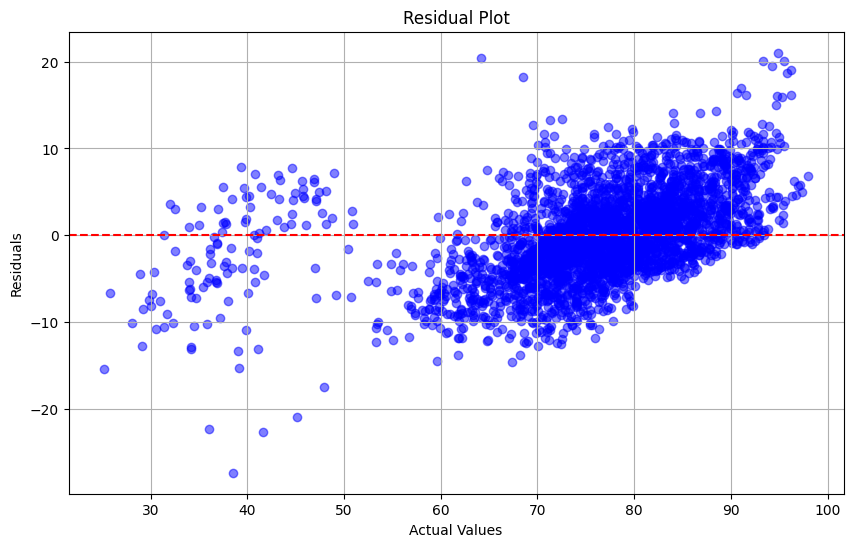

In [43]:
import matplotlib.pyplot as plt

residuals = y_test - stacked_preds

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

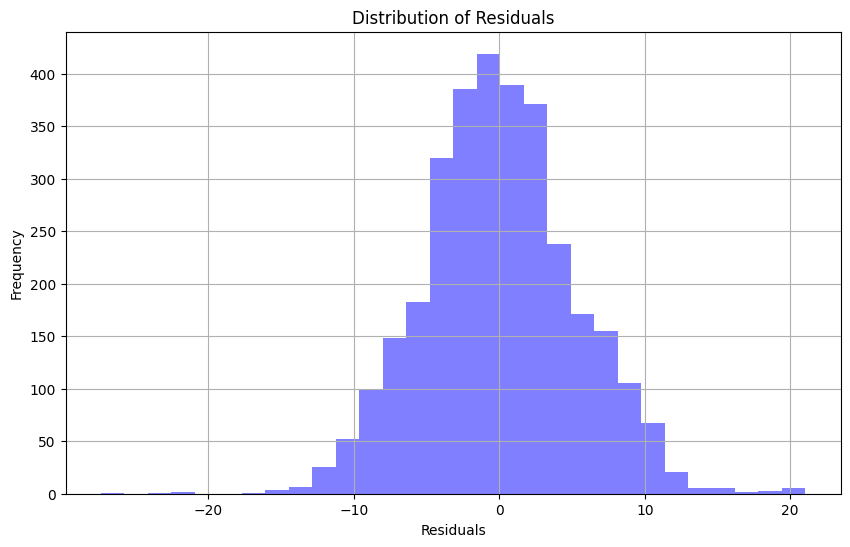

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.5)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

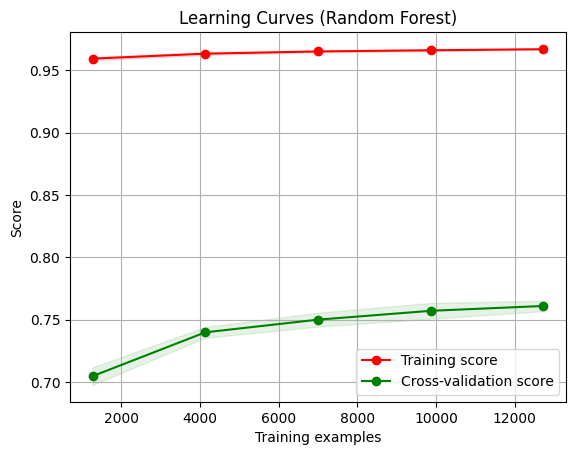

In [45]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit

X = cleaned_data.drop(columns=['Habitability_score'])
y = cleaned_data['Habitability_score']

model = RandomForestRegressor()

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

plot_learning_curve(model, "Learning Curves (Random Forest)", X, y, cv=cv, n_jobs=-1)

plt.show()

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(cleaned_data)
scaled_clean = pd.DataFrame(train_scaled, columns=cleaned_data.columns)
scaled_clean.head()

,Property_Type,Property_Area,Number_of_Doors,Power_Backup,Water_Supply,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score,Number_of_Windows,Furnishing,Frequency_of_Powercuts,Crime_Rate,Dust_and_Noise
0,-1.159133,-0.599743,-0.196828,-0.544001,1.197029,1.173102,0.067432,-0.182438,-0.407406,0.272297,-1.577143,-0.636398,-0.900057,0.127373
1,1.064893,0.107950,0.823064,-0.544001,1.197029,-0.961059,-1.188873,0.980071,0.651258,-0.317390,1.385701,-0.636398,0.860010,0.127373
2,1.064893,1.046276,0.823064,-0.544001,0.484052,1.148850,-0.811981,-1.738149,-0.087515,-0.317390,-0.095721,-0.636398,-1.780091,0.127373
3,1.064893,0.795108,1.842955,-0.544001,-0.941901,-0.488149,0.988723,1.407464,0.093970,-0.317390,-0.095721,-0.636398,0.860010,0.127373
4,1.064893,0.382813,-1.216720,-0.544001,1.197029,0.578932,-1.482011,0.980071,-0.414739,-0.169969,-0.095721,-0.636398,0.860010,0.127373


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

X = cleaned_data.drop(columns=['Habitability_score'])
y = cleaned_data['Habitability_score']
Xs = scaled_clean.drop(columns=['Habitability_score'])

X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor()
xgb_model = XGBRegressor()
et_model = ExtraTreesRegressor()
svr_model = SVR()
dt_model = DecisionTreeRegressor()

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
et_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
et_preds = et_model.predict(X_test)
svr_preds = svr_model.predict(X_test)
dt_preds = dt_model.predict(X_test)

stacked_X_train = np.column_stack((rf_preds, xgb_preds, et_preds, svr_preds, dt_preds))

meta_learner = LinearRegression()
meta_learner.fit(stacked_X_train, y_test)

stacked_preds = meta_learner.predict(stacked_X_train)

mse_stacked = mean_squared_error(y_test, stacked_preds)
print("Mean Squared Error (Stacked Model):", mse_stacked)


Mean Squared Error (Stacked Model): 27.317051375824207


## TRIAL 04 - Trying non-tree based models

In this trial we will try out all the models we can get our hands on. Some of them won't be tree based so we will scale the dataset for them.

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_scaled = scaler.fit_transform(combined_data)

scaled_data = pd.DataFrame(train_scaled, columns=combined_data.columns)
scaled_data.head()

,Property_Type,Property_Area,Number_of_Doors,Power_Backup,Water_Supply,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score,Number_of_Windows,Furnishing,Frequency_of_Powercuts,Crime_Rate,Dust_and_Noise
0,-1.066714,-0.659552,-1.131916,-0.450107,1.160109,-0.382854,-0.505529,0.158931,-0.103023,-0.469008,-0.101511,-0.649611,-0.801860,0.379896
1,-1.066714,-0.338123,-0.283241,-0.450107,0.455169,-1.629394,-0.408865,-0.229401,-0.158161,-0.719611,1.375724,0.686182,0.924621,0.379896
2,-1.066714,-0.336072,-0.283241,-0.450107,1.160109,0.896489,-0.006099,0.096297,-0.144730,0.028458,-1.578745,-0.649611,-0.801860,0.379896
3,-1.066714,-0.252511,-0.283241,1.756707,1.160109,-0.161430,-0.344423,-2.997826,-2.967333,-0.345576,1.375724,2.021976,0.061381,0.379896
4,-0.487574,0.433410,3.111459,-0.450107,-0.954711,-0.735494,-0.086652,1.298870,1.432337,3.768804,-1.578745,-0.649611,0.924621,0.379896


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
import numpy as np

X = combined_data.drop(columns=['Habitability_score']) 
y = combined_data['Habitability_score']
Xs = scaled_data.drop(columns=['Habitability_score']) 
ys = combined_data['Habitability_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor()
xgb_model = XGBRegressor()
et_model = ExtraTreesRegressor()
lr_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
svr_model = SVR()
knn_model = KNeighborsRegressor()
dt_model = DecisionTreeRegressor()
gb_model = GradientBoostingRegressor()
ada_model = AdaBoostRegressor()

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
et_model.fit(X_train, y_train)
lr_model.fit(Xs_train, ys_train) 
ridge_model.fit(Xs_train, ys_train)
lasso_model.fit(Xs_train, ys_train)
svr_model.fit(Xs_train, ys_train)
knn_model.fit(Xs_train, ys_train)
dt_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
et_preds = et_model.predict(X_test)
lr_preds = lr_model.predict(X_test)
ridge_preds = ridge_model.predict(Xs_test)
lasso_preds = lasso_model.predict(Xs_test)
svr_preds = svr_model.predict(Xs_test)
knn_preds = knn_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
gb_preds = gb_model.predict(X_test)
ada_preds = ada_model.predict(X_test)

stacked_X_train = np.column_stack((rf_preds, xgb_preds, et_preds, lr_preds, ridge_preds, lasso_preds, svr_preds, knn_preds, dt_preds, gb_preds, ada_preds))

meta_learner = LinearRegression()
meta_learner.fit(stacked_X_train, y_test)

stacked_preds = meta_learner.predict(stacked_X_train)

mse_stacked = mean_squared_error(y_test, stacked_preds)
print("Mean Squared Error (Stacked Model):", mse_stacked)

Mean Squared Error (Stacked Model): 30.20101468468057


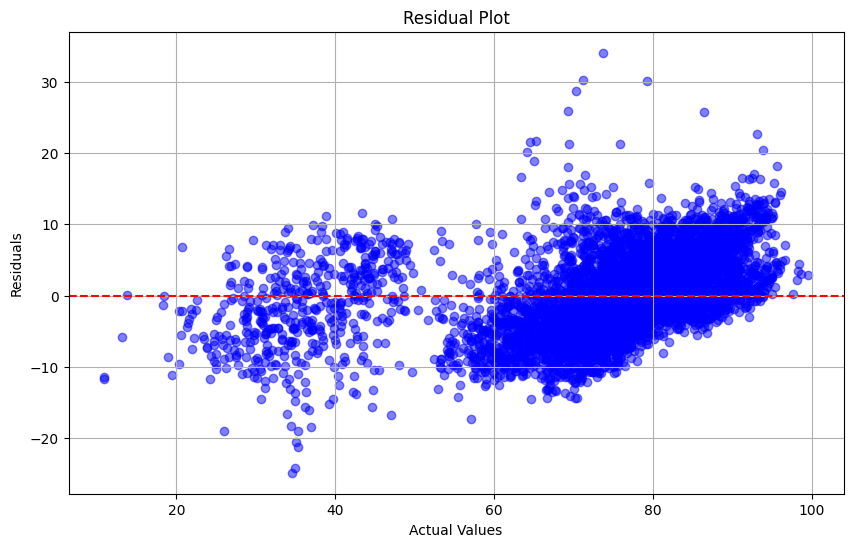

In [54]:
import matplotlib.pyplot as plt

# Compute residuals
residuals = y_test - stacked_preds

# Create residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

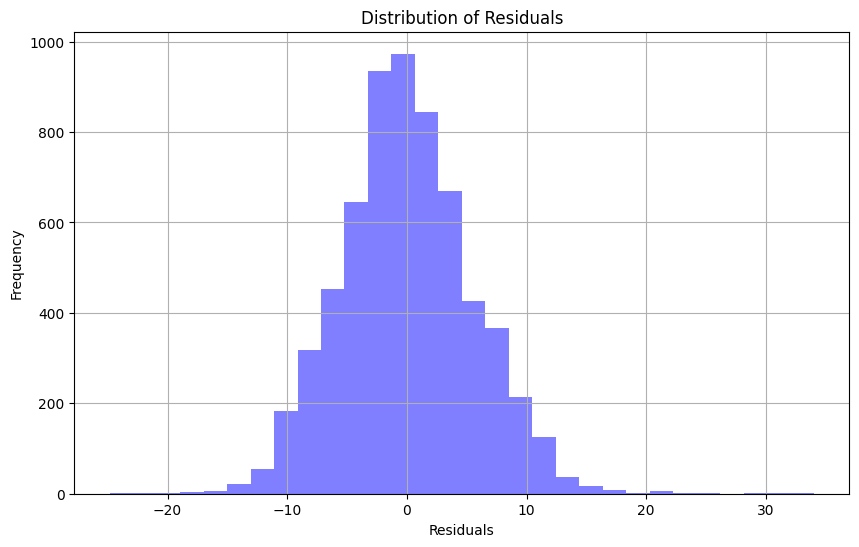

In [55]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.5)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Below code will run through different combinations of models and find the combination giving the best performance.

In [42]:
from itertools import combinations

base_models = {
    'RandomForest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'ExtraTrees': ExtraTreesRegressor(),
    # 'LinearRegression': LinearRegression(),
    # 'Ridge': Ridge(),
    # 'Lasso': Lasso(),
    'SVR': SVR(),
    'KNeighbors': KNeighborsRegressor(),
    'DecisionTree': DecisionTreeRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    # 'AdaBoost': AdaBoostRegressor(),
}

best_score = float('inf')
best_models = None

for i in range(1, len(base_models) + 1):
    for models_combination in combinations(base_models.keys(), i):
        print("Trying combination:", models_combination)
        
        models = {name: base_models[name] for name in models_combination}
        
        for model in models.values():
            if model.__class__.__name__ in ['SVR', 'KNeighbors']:
                model.fit(Xs_train, ys_train) 
            else:
                model.fit(X_train, y_train) 
                
        preds = []
        for name, model in models.items():
            if model.__class__.__name__ in ['SVR', 'KNeighbors']:
                preds.append(model.predict(Xs_test))
            else:
                preds.append(model.predict(X_test))
                
        stacked_X_train = np.column_stack(preds)
        
        meta_learner = LinearRegression()
        meta_learner.fit(stacked_X_train, y_test)

        stacked_preds = meta_learner.predict(stacked_X_train)

        mse_stacked = mean_squared_error(y_test, stacked_preds)
        print("Mean Squared Error (Stacked Model):", mse_stacked)
        
        if mse_stacked < best_score:
            best_score = mse_stacked
            best_models = models_combination

print("Best combination of models:", best_models)
print("Best Mean Squared Error:", best_score)


Trying combination: ('RandomForest',)
Mean Squared Error (Stacked Model): 30.95265509499482
Trying combination: ('XGBoost',)
Mean Squared Error (Stacked Model): 35.35097610064696
Trying combination: ('ExtraTrees',)
Mean Squared Error (Stacked Model): 32.55840868755994
Trying combination: ('SVR',)
Mean Squared Error (Stacked Model): 48.606015095103984
Trying combination: ('KNeighbors',)
Mean Squared Error (Stacked Model): 183.99821840536546
Trying combination: ('DecisionTree',)
Mean Squared Error (Stacked Model): 54.01630547905311
Trying combination: ('GradientBoosting',)
Mean Squared Error (Stacked Model): 45.7193359571133
Trying combination: ('RandomForest', 'XGBoost')
Mean Squared Error (Stacked Model): 30.640174125912083
Trying combination: ('RandomForest', 'ExtraTrees')
Mean Squared Error (Stacked Model): 30.60687058310714
Trying combination: ('RandomForest', 'SVR')
Mean Squared Error (Stacked Model): 30.797292800873628
Trying combination: ('RandomForest', 'KNeighbors')
Mean Square

Best combination of models: ('RandomForest', 'XGBoost', 'ExtraTrees', 'SVR', 'DecisionTree')
Best Mean Squared Error: 30.164842474546287

## Final Model

Using the insights gained from the 4 trials we will build the final model. From trial 2 we will use the pre-processed dataset and the hyper-parameter tuning. From trial 3 we will use the cleaning procedure for outliers. From trial 4 we will use the best combination of models for the stacked model.

In [57]:
cleaned_data = combined_data[
    (combined_data['Property_Area'].between(combined_data['Property_Area'].quantile(0.1), combined_data['Property_Area'].quantile(0.95))) &
    (combined_data['Number_of_Doors'].between(combined_data['Number_of_Doors'].quantile(0.1), combined_data['Number_of_Doors'].quantile(0.95))) &
    (combined_data['Power_Backup'].between(combined_data['Power_Backup'].quantile(0.1), combined_data['Power_Backup'].quantile(0.95))) &
    (combined_data['Traffic_Density_Score'].between(combined_data['Traffic_Density_Score'].quantile(0.1), combined_data['Traffic_Density_Score'].quantile(0.95))) &
    (combined_data['Air_Quality_Index'].between(combined_data['Air_Quality_Index'].quantile(0.1), combined_data['Air_Quality_Index'].quantile(0.95))) &
    (combined_data['Neighborhood_Review'].between(combined_data['Neighborhood_Review'].quantile(0.1), combined_data['Neighborhood_Review'].quantile(0.95))) &
    (combined_data['Number_of_Windows'].between(combined_data['Number_of_Windows'].quantile(0.1), combined_data['Number_of_Windows'].quantile(0.95))) &
    (combined_data['Frequency_of_Powercuts'].between(combined_data['Frequency_of_Powercuts'].quantile(0.1), combined_data['Frequency_of_Powercuts'].quantile(0.95))) &
    (combined_data['Dust_and_Noise'].between(combined_data['Dust_and_Noise'].quantile(0.1), combined_data['Dust_and_Noise'].quantile(0.95)))
]

print("Shape of cleaned dataset:", cleaned_data.shape)

Shape of cleaned dataset: (15918, 14)


In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

X = cleaned_data.drop(columns=['Habitability_score'])  
y = cleaned_data['Habitability_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
Xs_train = scaler.fit_transform(X_train)
Xs_train = pd.DataFrame(Xs_train, columns=X_train.columns)

Xs_test = scaler.fit_transform(X_test)
Xs_test = pd.DataFrame(Xs_test, columns=X_test.columns)

rf_param_grid = {
    'n_estimators': [300],
    'max_depth': [20],
    'min_samples_split': [5],
    'min_samples_leaf': [1]
}

xgb_param_grid = {
    'n_estimators': [100],
    'max_depth': [7],
    'learning_rate': [0.1]
}

et_param_grid = {
    'n_estimators': [300],
    'max_depth': [20],
    'min_samples_split': [10],
    'min_samples_leaf': [1]
}

svr_param_grid = {
    'kernel': ['rbf'],
    'C': [10],
    'epsilon': [0.1]
}

dt_param_grid = {
    'max_depth': [10],
    'min_samples_split': [10],
    'min_samples_leaf': [2]
}

rf_grid = GridSearchCV(estimator=RandomForestRegressor(), param_grid=rf_param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2)
xgb_grid = GridSearchCV(estimator=XGBRegressor(), param_grid=xgb_param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2)
et_grid = GridSearchCV(estimator=ExtraTreesRegressor(), param_grid=et_param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2)
svr_grid = GridSearchCV(estimator=SVR(), param_grid=svr_param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2)
dt_grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=dt_param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2)

rf_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)
et_grid.fit(X_train, y_train)
svr_grid.fit(Xs_train, y_train)
dt_grid.fit(X_train, y_train)

best_rf_model = rf_grid.best_estimator_
best_xgb_model = xgb_grid.best_estimator_
best_et_model = et_grid.best_estimator_
best_svr_model = svr_grid.best_estimator_
best_dt_model = dt_grid.best_estimator_

rf_preds = best_rf_model.predict(X_test)
xgb_preds = best_xgb_model.predict(X_test)
et_preds = best_et_model.predict(X_test)
svr_preds = best_svr_model.predict(Xs_test)
dt_preds = best_dt_model.predict(X_test)

stacked_X_train = np.column_stack((rf_preds, xgb_preds, et_preds, svr_preds, dt_preds))

meta_param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

meta_grid = GridSearchCV(estimator=LinearRegression(), param_grid=meta_param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2)
meta_grid.fit(stacked_X_train, y_test)

best_meta_learner = meta_grid.best_estimator_

stacked_preds = best_meta_learner.predict(stacked_X_train)

mse_stacked_tuned = root_mean_squared_error(y_test, stacked_preds)
print("Root Mean Squared Error (Tuned Stacked Model):", mse_stacked_tuned)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  17.1s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  17.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=  17.6s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   0.1s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   6.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   6.9s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estima

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, explained_variance_score

mae_stacked = mean_absolute_error(y_test, stacked_preds)
rmse_stacked = mean_squared_error(y_test, stacked_preds)
r2_stacked = r2_score(y_test, stacked_preds)
mape_stacked = mean_absolute_percentage_error(y_test, stacked_preds)
explained_variance_stacked = explained_variance_score(y_test, stacked_preds)

print("Mean Absolute Error (Stacked Model):", mae_stacked)
print("Mean Squared Error (Stacked Model):", rmse_stacked)
print("R-squared (Stacked Model):", r2_stacked)
print("Mean Absolute Percentage Error (Stacked Model):", mape_stacked)
print("Explained Variance Score (Stacked Model):", explained_variance_stacked)

Mean Absolute Error (Stacked Model): 4.049799746094785
Mean Squared Error (Stacked Model): 26.583625388486453
R-squared (Stacked Model): 0.7712018636023854
Mean Absolute Percentage Error (Stacked Model): 0.056246335549007535
Explained Variance Score (Stacked Model): 0.7712018718410576


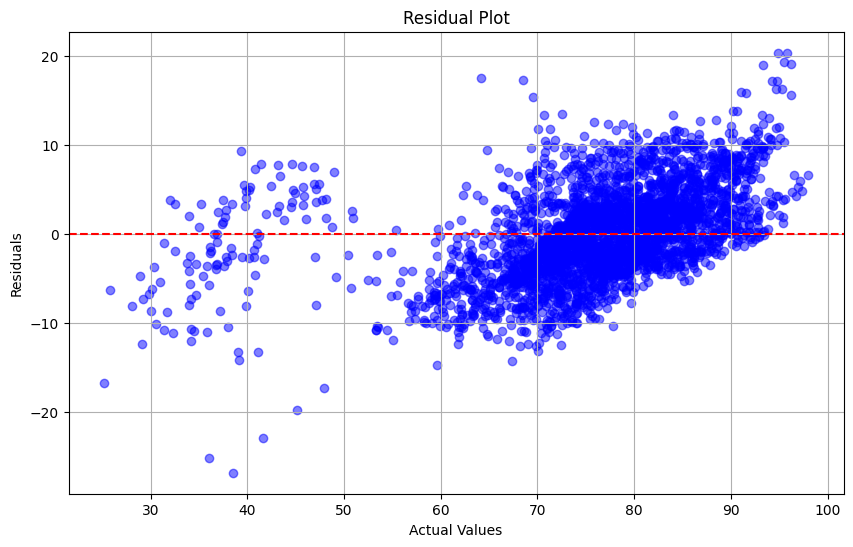

In [61]:
import matplotlib.pyplot as plt

residuals = y_test - stacked_preds

plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

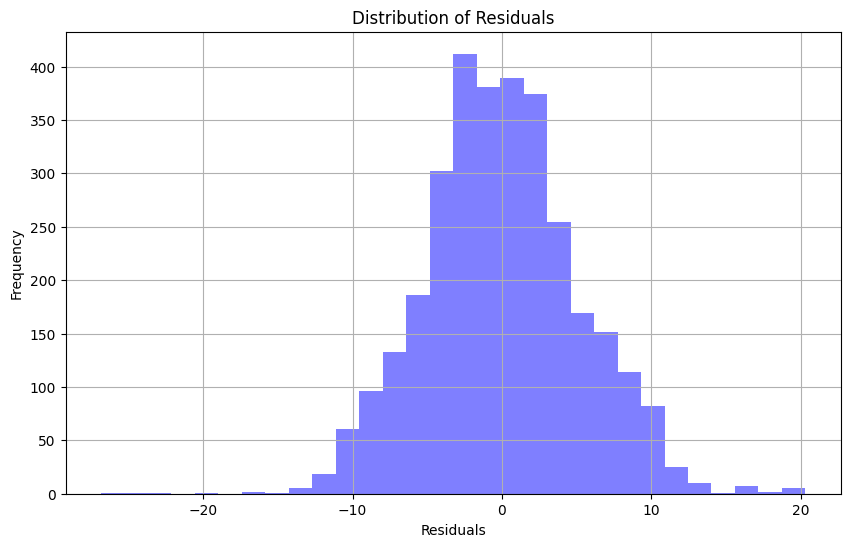

In [62]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.5)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

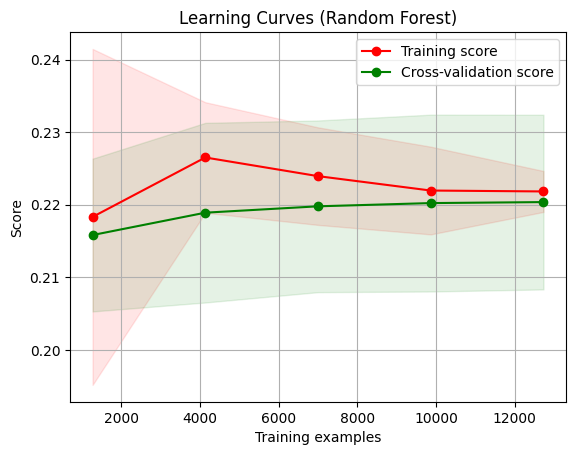

In [63]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit

X = cleaned_data.drop(columns=['Habitability_score'])
y = cleaned_data['Habitability_score']

model = best_meta_learner

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

plot_learning_curve(model, "Learning Curves (Random Forest)", X, y, cv=cv, n_jobs=-1)

plt.show()

## Predicting on Testing Dataset

In [18]:
import pandas as pd

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

print('The shape of training dataset : ' + str(train_data.shape))
print('The shape of testing dataset : ' + str(test_data.shape))

The shape of training dataset : (31599, 15)
The shape of testing dataset : (7900, 14)


In [19]:
good_features = test_data.dropna(axis=1).columns.tolist()
missing_features = [col for col in test_data.columns if col not in good_features]

print('Features with missing values :', missing_features)
print('Features without missing values :', good_features)

Features with missing values : ['Number_of_Windows', 'Furnishing', 'Frequency_of_Powercuts', 'Crime_Rate', 'Dust_and_Noise']
Features without missing values : ['Id', 'Property_Type', 'Property_Area', 'Number_of_Doors', 'Power_Backup', 'Water_Supply', 'Traffic_Density_Score', 'Air_Quality_Index', 'Neighborhood_Review']


In [20]:
good_features.extend([missing_features[0]])
print(good_features)

['Id', 'Property_Type', 'Property_Area', 'Number_of_Doors', 'Power_Backup', 'Water_Supply', 'Traffic_Density_Score', 'Air_Quality_Index', 'Neighborhood_Review', 'Number_of_Windows']


In [21]:
temp_data = test_data[good_features]
temp_data.head()

,Id,Property_Type,Property_Area,Number_of_Doors,Power_Backup,Water_Supply,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Number_of_Windows
0,0x6808,Single-family home,1521,1,No,All time,7.61,156.0,4.71,5.0
1,0x6a98,Single-family home,2233,1,No,Once in a day - Morning,5.28,82.0,4.50,2.0
2,0xacc0,Apartment,986,1,No,All time,7.72,91.0,4.79,1.0
3,0x8225,Single-family home,1625,1,No,Once in a day - Evening,6.19,159.0,4.09,2.0
4,0xaee8,Single-family home,1166,2,No,Once in a day - Evening,5.84,82.0,3.56,2.0


In [22]:
from sklearn.preprocessing import OrdinalEncoder

temp_data = temp_data.drop(columns=['Id'])
categorical_features = ['Property_Type', 'Power_Backup', 'Water_Supply'] 

ordinal_encoder = OrdinalEncoder()
temp_data[categorical_features] = ordinal_encoder.fit_transform(temp_data[categorical_features])

temp_data.head()

,Property_Type,Property_Area,Number_of_Doors,Power_Backup,Water_Supply,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Number_of_Windows
0,5.0,1521,1,1.0,0.0,7.61,156.0,4.71,5.0
1,5.0,2233,1,1.0,3.0,5.28,82.0,4.50,2.0
2,1.0,986,1,1.0,0.0,7.72,91.0,4.79,1.0
3,5.0,1625,1,1.0,2.0,6.19,159.0,4.09,2.0
4,5.0,1166,2,1.0,2.0,5.84,82.0,3.56,2.0


In [23]:
missing_set = temp_data[temp_data.isnull().any(axis=1)]
print(missing_set.shape)

temp_data.dropna(axis=0, inplace=True)
print(temp_data.shape)

(321, 9)
(7579, 9)


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import numpy as np

X_train = temp_data.drop(columns=['Number_of_Windows'])
y_train = temp_data['Number_of_Windows']

model = LinearRegression()
model.fit(X_train, y_train)

X_test = missing_set.drop(columns=['Number_of_Windows'])
predicted_values = model.predict(X_test)

print(predicted_values)

[3.88238936 4.30907509 3.31853319 3.32534974 3.15428861 3.47289286
 4.31390312 2.56390777 4.72645942 2.62089728 2.65468693 3.69858819
 3.32013255 4.15414715 4.11524689 2.54336615 6.72995612 4.07430669
 3.87494772 3.66322971 2.89544055 4.05661236 3.22581637 5.17299366
 3.32878263 4.51761147 3.23879915 4.11273257 3.62062128 4.38138647
 3.22720243 4.40383702 3.35545796 3.9472239  4.60974803 4.65636319
 3.92637396 4.14424541 5.51461568 3.10612938 4.1805483  2.68238399
 3.29920486 3.03155371 4.25495565 4.83275922 2.65373266 6.42306036
 4.09929131 5.34793514 3.1635618  7.38449878 3.32930009 3.29320043
 2.35853323 4.45289567 5.77507697 5.41667392 4.43231953 4.00375611
 3.38571138 3.23573981 2.58729581 5.50952428 5.68320285 3.43864451
 4.6596327  4.13417274 4.37570861 5.56602872 3.18271913 3.97713427
 4.92038022 2.61553981 4.62283386 3.87024809 2.7289888  3.99152497
 3.85595812 2.60393848 3.29324638 4.18767154 6.52153993 2.43933145
 2.48526865 4.39079912 5.32938331 3.82084646 9.8454314  4.7957

In [25]:
missing_set['Number_of_Windows'] = predicted_values
combined_test = pd.concat([temp_data, missing_set])
combined_test.sort_index(inplace=True)

print(combined_test)

      Property_Type  Property_Area  Number_of_Doors  Power_Backup  \
0               5.0           1521                1           1.0   
1               5.0           2233                1           1.0   
2               1.0            986                1           1.0   
3               5.0           1625                1           1.0   
4               5.0           1166                2           1.0   
...             ...            ...              ...           ...   
7895            5.0           1120                2           1.0   
7896            1.0            445                3           1.0   
7897            2.0           3780                6           2.0   
7898            5.0           1266                1           1.0   
7899            5.0           1229                4           1.0   

      Water_Supply  Traffic_Density_Score  Air_Quality_Index  \
0              0.0                   7.61              156.0   
1              3.0                   5.28  

C:\Users\ROG\AppData\Local\Temp\ipykernel_25660\2114650630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_set['Number_of_Windows'] = predicted_values


In [26]:
temp_data = combined_test
temp_data['Furnishing'] = test_data['Furnishing']

categorical_features = ['Furnishing'] 

ordinal_encoder = OrdinalEncoder()
temp_data[categorical_features] = ordinal_encoder.fit_transform(temp_data[categorical_features])

missing_set = temp_data[temp_data.isnull().any(axis=1)]
temp_data.dropna(axis=0, inplace=True)

X_train = temp_data.drop(columns=['Furnishing'])
y_train = temp_data['Furnishing']

model = LinearRegression()
model.fit(X_train, y_train)
X_test = missing_set.drop(columns=['Furnishing'])
predicted_values = model.predict(X_test)

missing_set['Furnishing'] = predicted_values
combined_test = pd.concat([temp_data, missing_set])
combined_test.sort_index(inplace=True)

print(combined_test)

      Property_Type  Property_Area  Number_of_Doors  Power_Backup  \
0               5.0           1521                1           1.0   
1               5.0           2233                1           1.0   
2               1.0            986                1           1.0   
3               5.0           1625                1           1.0   
4               5.0           1166                2           1.0   
...             ...            ...              ...           ...   
7895            5.0           1120                2           1.0   
7896            1.0            445                3           1.0   
7897            2.0           3780                6           2.0   
7898            5.0           1266                1           1.0   
7899            5.0           1229                4           1.0   

      Water_Supply  Traffic_Density_Score  Air_Quality_Index  \
0              0.0                   7.61              156.0   
1              3.0                   5.28  

C:\Users\ROG\AppData\Local\Temp\ipykernel_25660\4177555470.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_set['Furnishing'] = predicted_values


In [27]:
temp_data = combined_test
temp_data['Frequency_of_Powercuts'] = test_data['Frequency_of_Powercuts']

missing_set = temp_data[temp_data.isnull().any(axis=1)]
temp_data.dropna(axis=0, inplace=True)

X_train = temp_data.drop(columns=['Frequency_of_Powercuts'])
y_train = temp_data['Frequency_of_Powercuts']

model = LinearRegression()
model.fit(X_train, y_train)
X_test = missing_set.drop(columns=['Frequency_of_Powercuts'])
predicted_values = model.predict(X_test)

missing_set['Frequency_of_Powercuts'] = predicted_values
combined_test = pd.concat([temp_data, missing_set])
combined_test.sort_index(inplace=True)

print(combined_test)

      Property_Type  Property_Area  Number_of_Doors  Power_Backup  \
0               5.0           1521                1           1.0   
1               5.0           2233                1           1.0   
2               1.0            986                1           1.0   
3               5.0           1625                1           1.0   
4               5.0           1166                2           1.0   
...             ...            ...              ...           ...   
7895            5.0           1120                2           1.0   
7896            1.0            445                3           1.0   
7897            2.0           3780                6           2.0   
7898            5.0           1266                1           1.0   
7899            5.0           1229                4           1.0   

      Water_Supply  Traffic_Density_Score  Air_Quality_Index  \
0              0.0                   7.61              156.0   
1              3.0                   5.28  

C:\Users\ROG\AppData\Local\Temp\ipykernel_25660\4059458983.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_set['Frequency_of_Powercuts'] = predicted_values


In [28]:
temp_data = combined_test
temp_data['Crime_Rate'] = test_data['Crime_Rate']

categorical_features = ['Crime_Rate'] 

ordinal_encoder = OrdinalEncoder()
temp_data[categorical_features] = ordinal_encoder.fit_transform(temp_data[categorical_features])

missing_set = temp_data[temp_data.isnull().any(axis=1)]
temp_data.dropna(axis=0, inplace=True)

X_train = temp_data.drop(columns=['Crime_Rate'])
y_train = temp_data['Crime_Rate']

model = LinearRegression()
model.fit(X_train, y_train)
X_test = missing_set.drop(columns=['Crime_Rate'])
predicted_values = model.predict(X_test)

missing_set['Crime_Rate'] = predicted_values
combined_test = pd.concat([temp_data, missing_set])
combined_test.sort_index(inplace=True)

print(combined_test)

      Property_Type  Property_Area  Number_of_Doors  Power_Backup  \
0               5.0           1521                1           1.0   
1               5.0           2233                1           1.0   
2               1.0            986                1           1.0   
3               5.0           1625                1           1.0   
4               5.0           1166                2           1.0   
...             ...            ...              ...           ...   
7895            5.0           1120                2           1.0   
7896            1.0            445                3           1.0   
7897            2.0           3780                6           2.0   
7898            5.0           1266                1           1.0   
7899            5.0           1229                4           1.0   

      Water_Supply  Traffic_Density_Score  Air_Quality_Index  \
0              0.0                   7.61              156.0   
1              3.0                   5.28  

C:\Users\ROG\AppData\Local\Temp\ipykernel_25660\1142880899.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_set['Crime_Rate'] = predicted_values


In [29]:
temp_data = combined_test
temp_data['Dust_and_Noise'] = test_data['Dust_and_Noise']

categorical_features = ['Dust_and_Noise'] 

ordinal_encoder = OrdinalEncoder()
temp_data[categorical_features] = ordinal_encoder.fit_transform(temp_data[categorical_features])

missing_set = temp_data[temp_data.isnull().any(axis=1)]
temp_data.dropna(axis=0, inplace=True)

X_train = temp_data.drop(columns=['Dust_and_Noise'])
y_train = temp_data['Dust_and_Noise']

model = LinearRegression()
model.fit(X_train, y_train)
X_test = missing_set.drop(columns=['Dust_and_Noise'])
predicted_values = model.predict(X_test)

missing_set['Dust_and_Noise'] = predicted_values
combined_test = pd.concat([temp_data, missing_set])
combined_test.sort_index(inplace=True)

print(combined_test)

      Property_Type  Property_Area  Number_of_Doors  Power_Backup  \
0               5.0           1521                1           1.0   
1               5.0           2233                1           1.0   
2               1.0            986                1           1.0   
3               5.0           1625                1           1.0   
4               5.0           1166                2           1.0   
...             ...            ...              ...           ...   
7895            5.0           1120                2           1.0   
7896            1.0            445                3           1.0   
7897            2.0           3780                6           2.0   
7898            5.0           1266                1           1.0   
7899            5.0           1229                4           1.0   

      Water_Supply  Traffic_Density_Score  Air_Quality_Index  \
0              0.0                   7.61              156.0   
1              3.0                   5.28  

C:\Users\ROG\AppData\Local\Temp\ipykernel_25660\332086740.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_set['Dust_and_Noise'] = predicted_values


In [30]:
print(combined_test.isnull().sum())

Property_Type             0
Property_Area             0
Number_of_Doors           0
Power_Backup              0
Water_Supply              0
Traffic_Density_Score     0
Air_Quality_Index         0
Neighborhood_Review       0
Number_of_Windows         0
Furnishing                0
Frequency_of_Powercuts    0
Crime_Rate                0
Dust_and_Noise            0
dtype: int64


In [31]:
combined_test.head()

,Property_Type,Property_Area,Number_of_Doors,Power_Backup,Water_Supply,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Number_of_Windows,Furnishing,Frequency_of_Powercuts,Crime_Rate,Dust_and_Noise
0,5.0,1521,1,1.0,0.0,7.61,156.0,4.71,5.0,2.0,0.0,3.0,2.0
1,5.0,2233,1,1.0,3.0,5.28,82.0,4.50,2.0,1.0,0.0,3.0,2.0
2,1.0,986,1,1.0,0.0,7.72,91.0,4.79,1.0,2.0,0.0,3.0,2.0
3,5.0,1625,1,1.0,2.0,6.19,159.0,4.09,2.0,1.0,0.0,3.0,2.0
4,5.0,1166,2,1.0,2.0,5.84,82.0,3.56,2.0,0.0,0.0,1.0,2.0


In [92]:
test_data = pd.read_csv("test.csv")

rf_test_preds = best_rf_model.predict(combined_test)
xgb_test_preds = best_xgb_model.predict(combined_test)
et_test_preds = best_et_model.predict(combined_test)
svr_test_preds = best_svr_model.predict(scaler.transform(combined_test))
dt_test_preds = best_dt_model.predict(combined_test)

stacked_X_test = np.column_stack((rf_test_preds, xgb_test_preds, et_test_preds, svr_test_preds, dt_test_preds))

final_test_preds = best_meta_learner.predict(stacked_X_test)

predictions_df = pd.DataFrame({'Id': test_data['Id'], 'Habitability_score': final_test_preds})

predictions_df.to_csv("predicted_test2.csv", index=False)

c:\Users\ROG\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd

# Load the predicted test datasets
predicted_test = pd.read_csv('predicted_test.csv')
predicted_test1 = pd.read_csv('predicted_test1.csv')
predicted_test2 = pd.read_csv('predicted_test2.csv')

# Assign weights based on RMSE scores
weights = {
    'predicted_test.csv': 1 / 5.87589,  # Lower RMSE, higher weight
    'predicted_test1.csv': 1 / 6.73085,
    'predicted_test2.csv': 1 / 8.76982
}

# Scale weights to sum up to 1
total_weight = sum(weights.values())
weights = {k: v / total_weight for k, v in weights.items()}

# Combine predictions with weights
combined_predictions = (predicted_test.drop(columns=['Id']) * weights['predicted_test.csv'] +
                        predicted_test1.drop(columns=['Id']) * weights['predicted_test1.csv'] +
                        predicted_test2.drop(columns=['Id']) * weights['predicted_test2.csv'])

# Compute aggregate statistics
ensemble_predictions = combined_predictions.mean(axis=1)  # You can try other aggregate functions like median

# # Save the ensemble predictions to a new CSV file
# ensemble_predictions.to_csv('ensemble_predictions.csv', index=False, header=['Habitability_score'])

# Create a new DataFrame with 'Id' and 'Habitability_score' columns
predictions_df = pd.DataFrame({'Id': predicted_test['Id'], 'Habitability_score': ensemble_predictions})

# Write the predictions to a new CSV file
predictions_df.to_csv("predicted_test3.csv", index=False)

In [67]:
from sklearn.model_selection import GridSearchCV

X = combined_data.drop(columns=['Habitability_score'])
y = combined_data['Habitability_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

et_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf_grid = GridSearchCV(estimator=RandomForestRegressor(), param_grid=rf_param_grid, scoring='neg_mean_squared_error', cv=3, verbose= 2)
xgb_grid = GridSearchCV(estimator=XGBRegressor(), param_grid=xgb_param_grid, scoring='neg_mean_squared_error', cv=3, verbose= 2)
et_grid = GridSearchCV(estimator=ExtraTreesRegressor(), param_grid=et_param_grid, scoring='neg_mean_squared_error', cv=3, verbose= 2)

rf_grid.fit(X_train, y_train)
xgb_grid.fit(X_train, y_train)
et_grid.fit(X_train, y_train)

best_rf_model = rf_grid.best_estimator_
best_xgb_model = xgb_grid.best_estimator_
best_et_model = et_grid.best_estimator_

rf_preds = best_rf_model.predict(X_test)
xgb_preds = best_xgb_model.predict(X_test)
et_preds = best_et_model.predict(X_test)

stacked_X_train = np.column_stack((rf_preds, xgb_preds, et_preds))

meta_param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

meta_grid = GridSearchCV(estimator=LinearRegression(), param_grid=meta_param_grid, scoring='neg_mean_squared_error', cv=3, verbose= 2)
meta_grid.fit(stacked_X_train, y_test)

best_meta_learner = meta_grid.best_estimator_

stacked_preds = best_meta_learner.predict(stacked_X_train)

mse_stacked_tuned = mean_squared_error(y_test, stacked_preds)
print("Mean Squared Error (Tuned Stacked Model):", mse_stacked_tuned)


Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2

c:\Users\ROG\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
243 fits failed out of a total of 486.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
243 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ROG\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ROG\miniconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\ROG\miniconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\ROG\miniconda3\Lib\site-packages\sk

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END 

c:\Users\ROG\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
243 fits failed out of a total of 486.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
243 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ROG\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ROG\miniconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\ROG\miniconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\ROG\miniconda3\Lib\site-packages\sk

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ..................fit_intercept=True, positive=True; total time=   0.0s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.0s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.0s
[CV] END .................fit_intercept=True, positive=False; total time=   0.0s
[CV] END .................fit_intercept=True, positive=False; total time=   0.0s
[CV] END .................fit_intercept=True, positive=False; total time=   0.0s
[CV] END .................fit_intercept=False, positive=True; total time=   0.0s
[CV] END .................fit_intercept=False, positive=True; total time=   0.0s
[CV] END .................fit_intercept=False, positive=True; total time=   0.0s
[CV] END ................fit_intercept=False, positive=False; total time=   0.0s
[CV] END ................fit_intercept=False, positive=False; total time=   0.0s
[CV] END ................fit_intercept=False, pos

In [68]:
print("Best hyperparameters for Random Forest:")
print(rf_grid.best_params_)

print("\nBest hyperparameters for XGBoost:")
print(xgb_grid.best_params_)

print("\nBest hyperparameters for Extra Trees:")
print(et_grid.best_params_)


Best hyperparameters for Random Forest:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Best hyperparameters for XGBoost:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}

Best hyperparameters for Extra Trees:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
